In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
# etc.

# Load the dataset from the uploaded file
bh_data = pd.read_csv('D:\CS Classes at GT\CS 7641 - ML\ASSIGNMENT - 3/boston.csv')
print(bh_data.head())
print(bh_data.info())


      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-nu

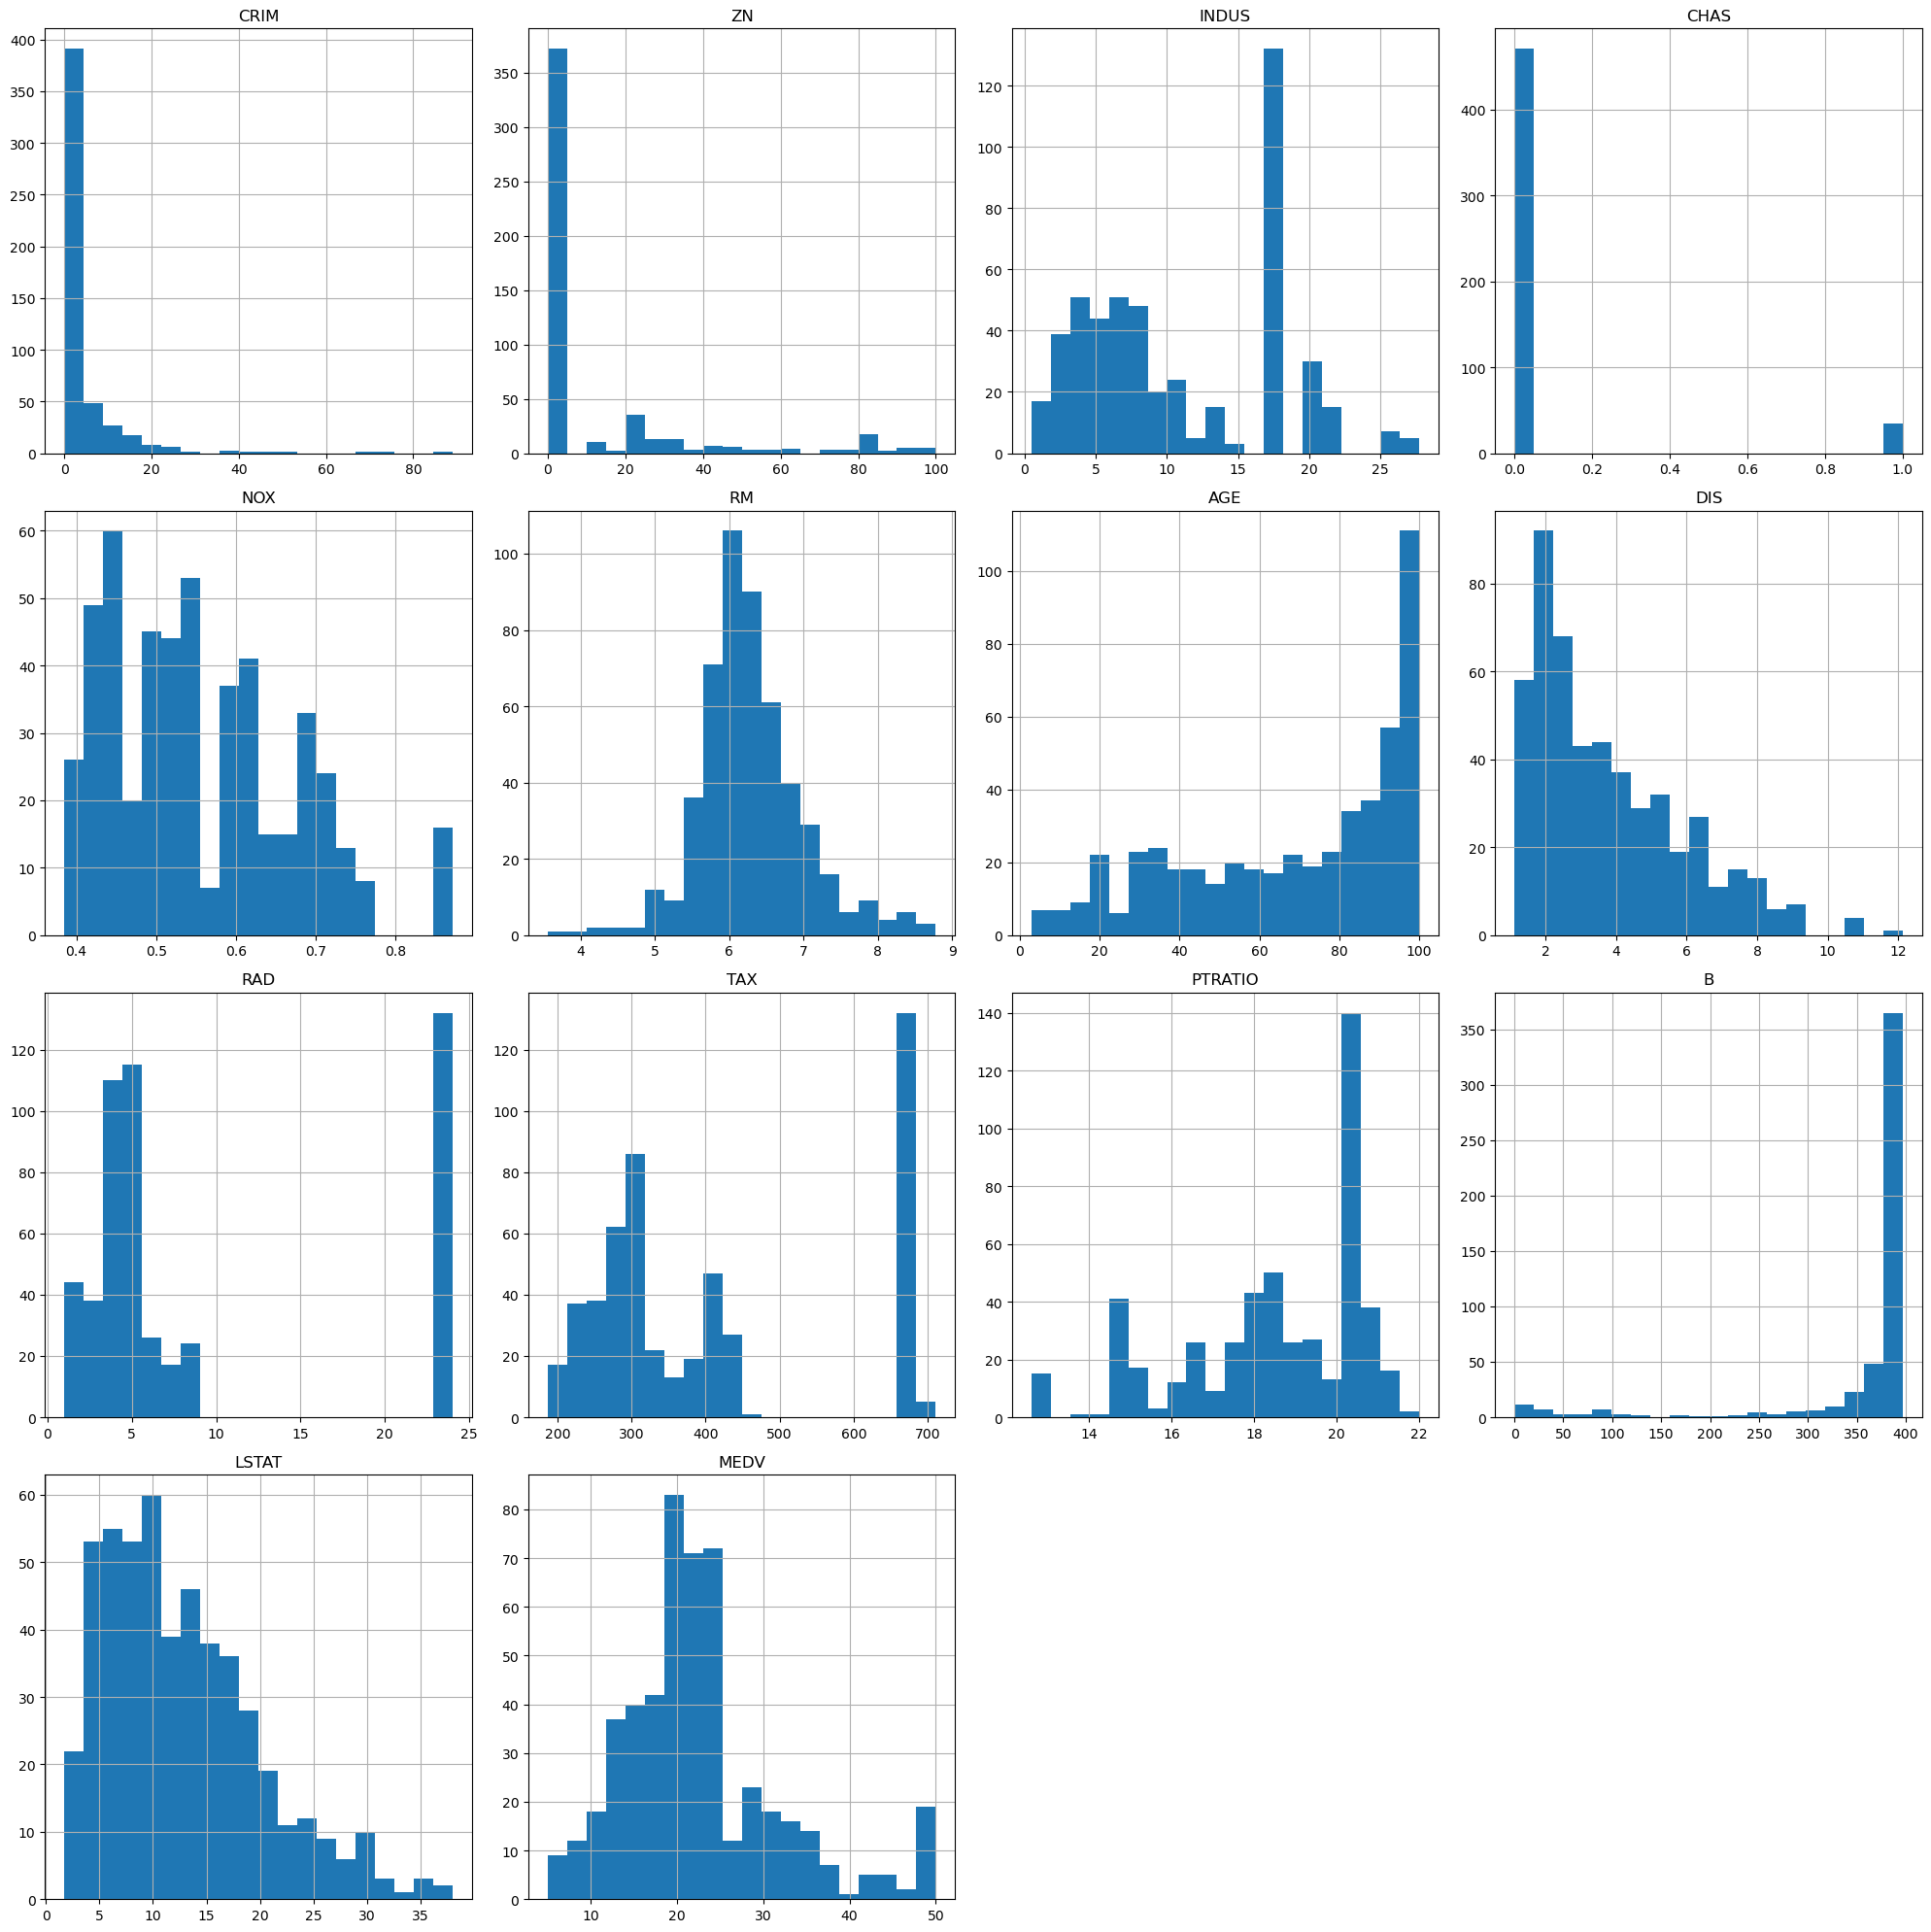

In [53]:
# Visualize the distribution of each feature in the dataset
bh_data.hist(figsize=(20, 20), bins=20)
plt.tight_layout()  # Adjusts subplots to fit into the figure area.
plt.show()


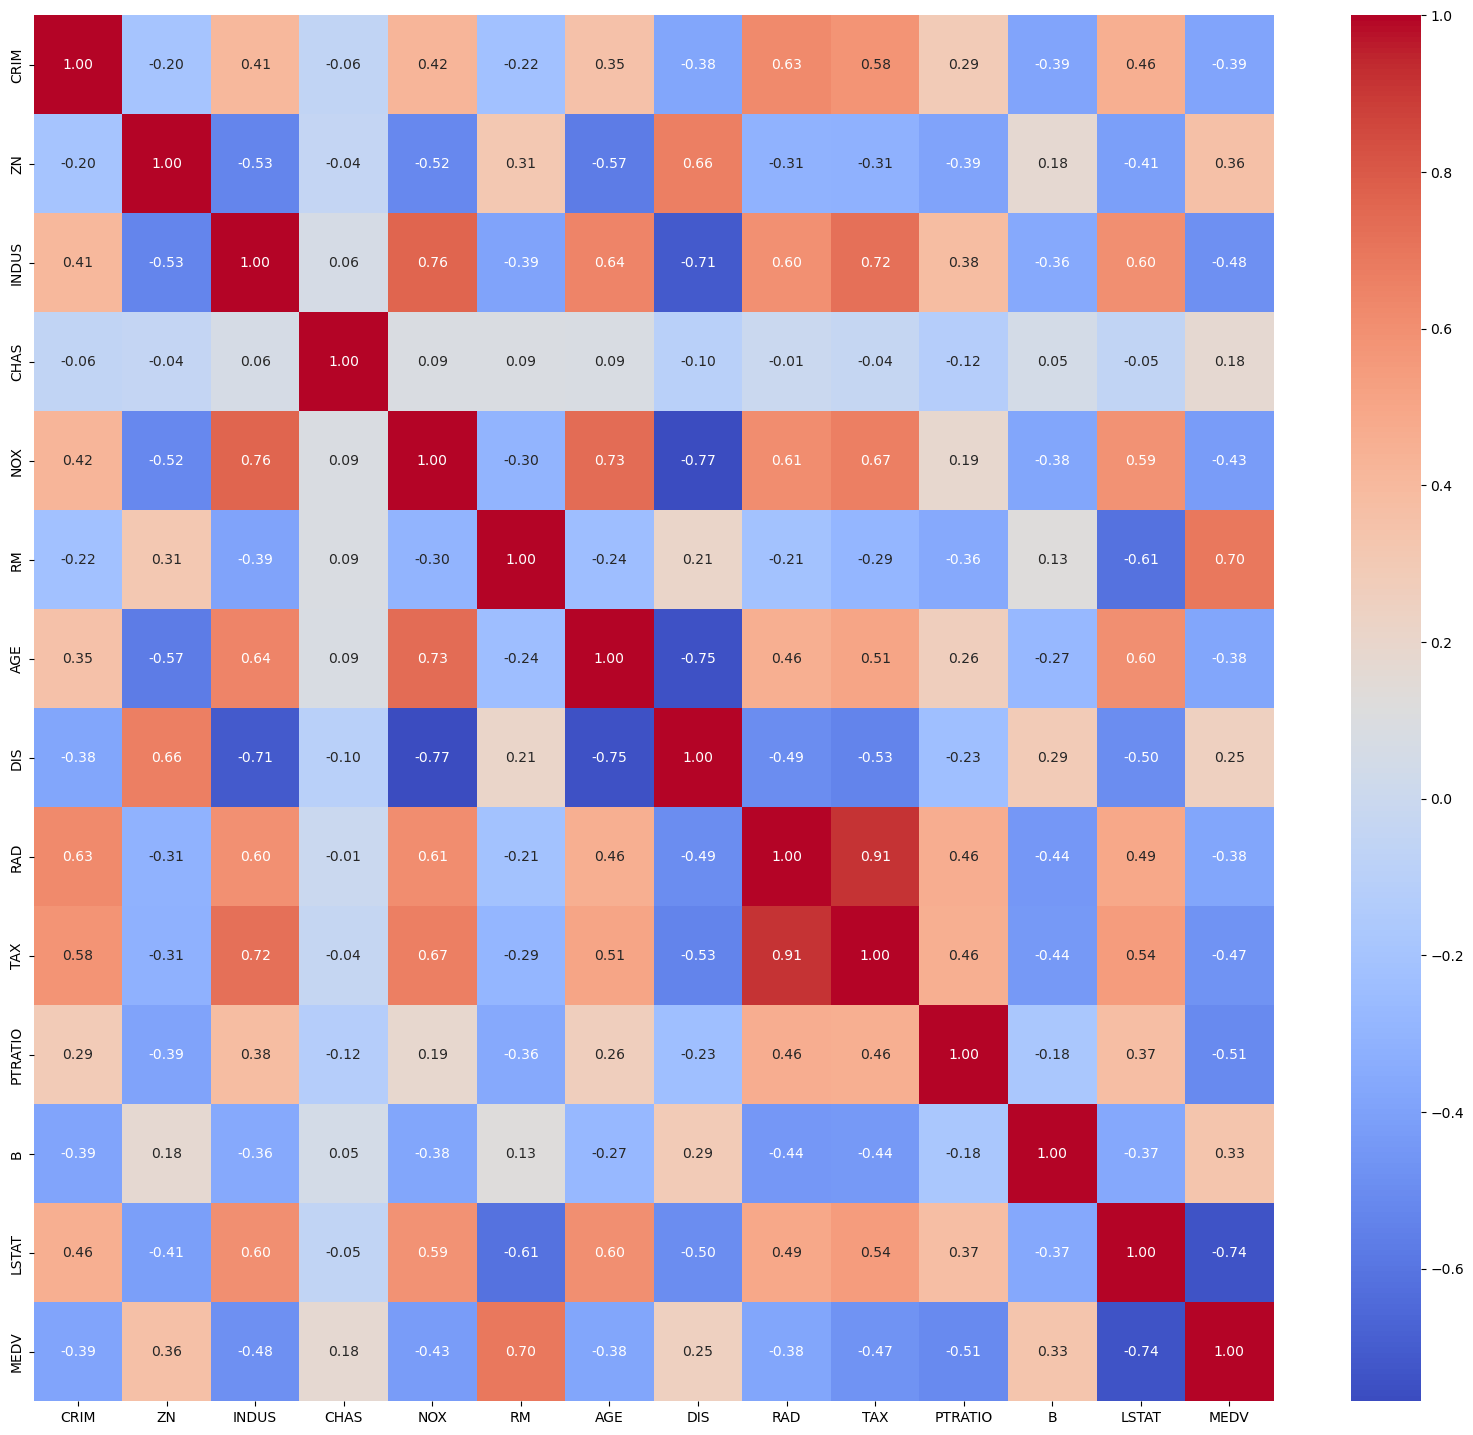

In [54]:
plt.figure(figsize=(20, 18))
# Generate a heatmap for the correlation matrix of the Boston Housing dataset
sns.heatmap(bh_data.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

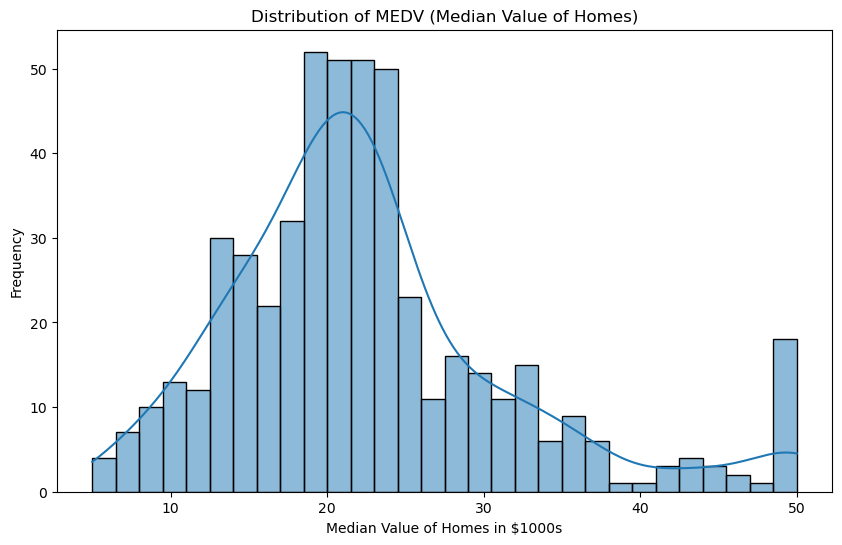

In [55]:
plt.figure(figsize=(10, 6))
sns.histplot(bh_data['MEDV'], bins=30, kde=True)
plt.title('Distribution of MEDV (Median Value of Homes)')
plt.xlabel('Median Value of Homes in $1000s')
plt.ylabel('Frequency')
plt.show()


In [56]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define the features (independent variables) and the target (dependent variable)
X = bh_data.drop('MEDV', axis=1)
y = bh_data['MEDV']

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

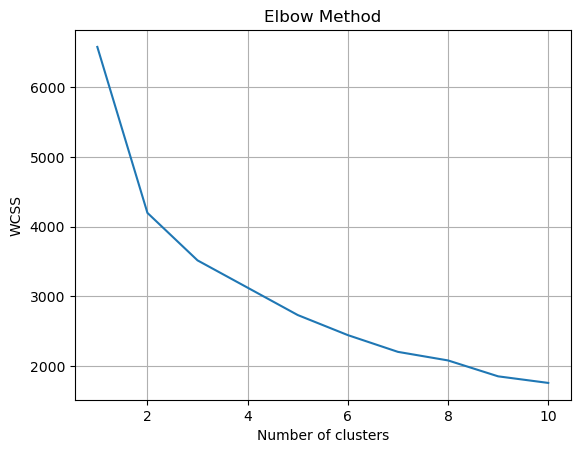

In [57]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method graph with a grid
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within Cluster Sum of Squares
plt.grid(True)  # This adds a grid to the plot
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Homogeneity: 0.232
Completeness: 0.683
V-measure: 0.347
Adjusted Rand Index (ARI): 0.007


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarni

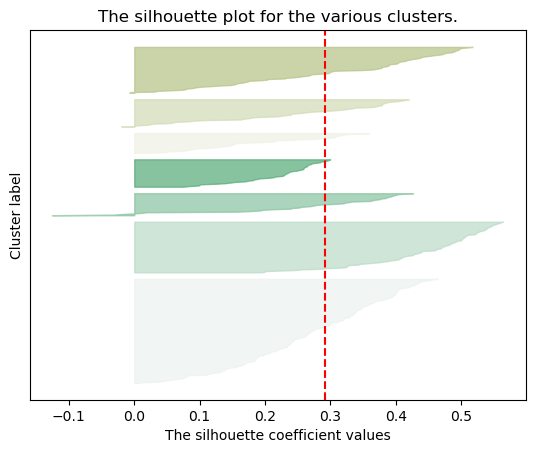

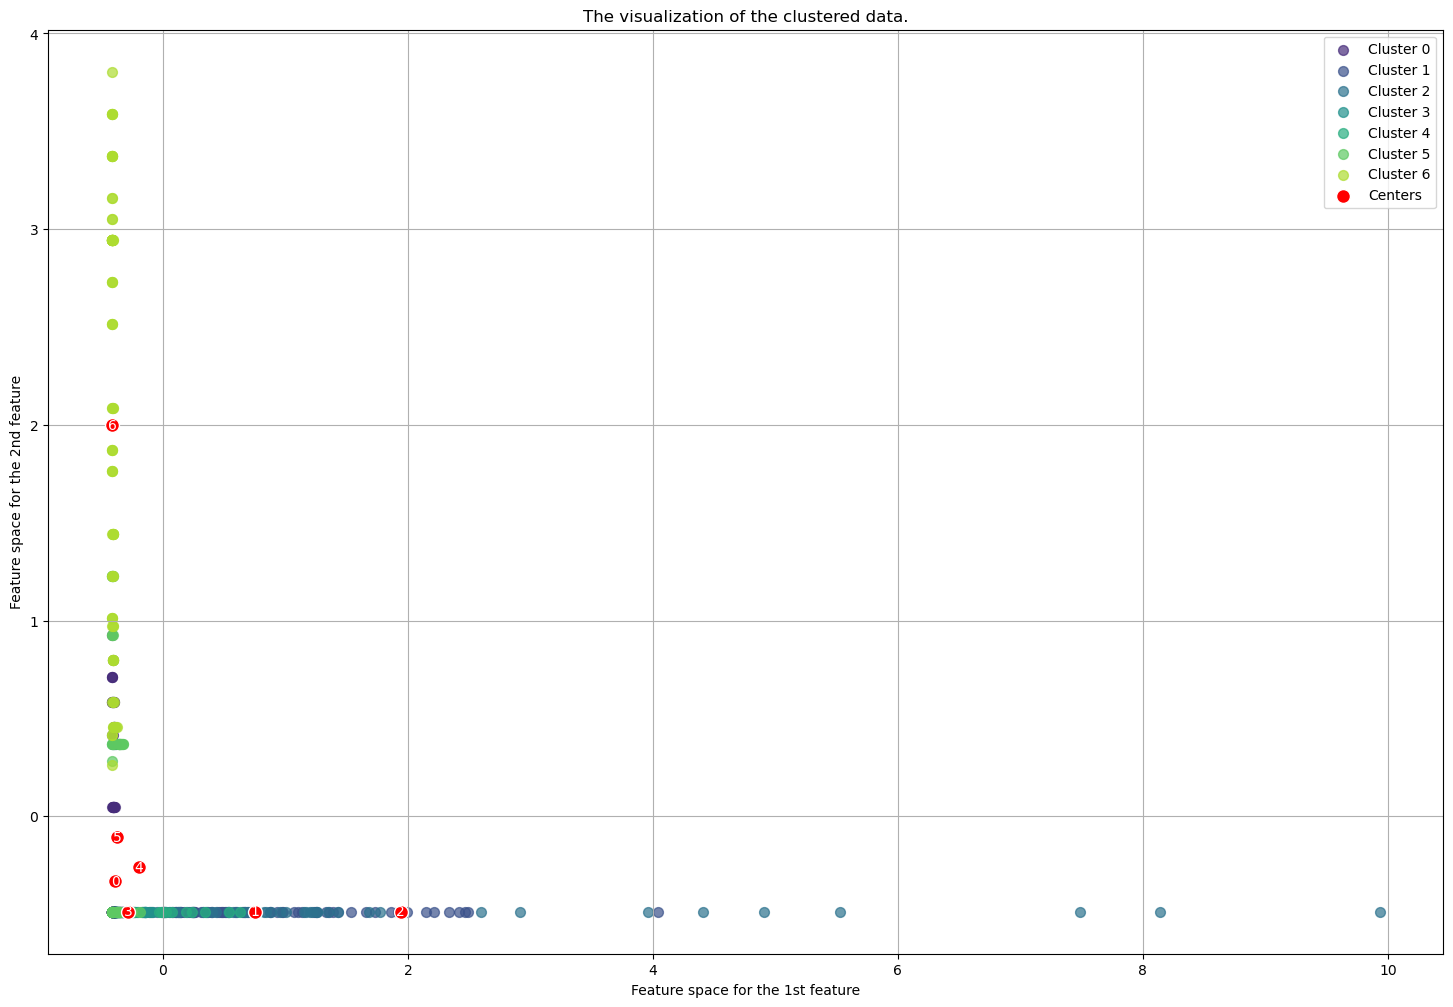

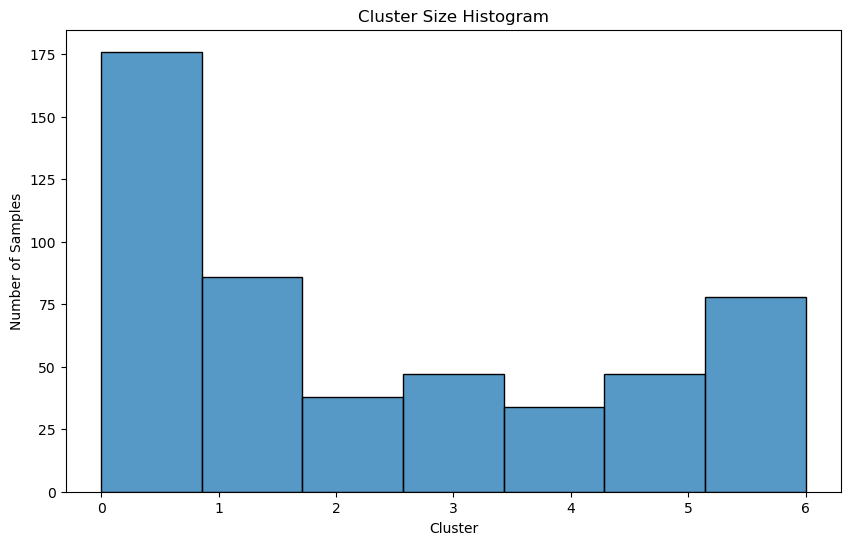

In [37]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score
from matplotlib.colors import to_rgba 
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap



# Fit K-Means with the chosen number of clusters
optimal_k = 7
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Calculate silhouette scores
silhouette_avg = silhouette_score(X_scaled, clusters)
sample_silhouette_values = silhouette_samples(X_scaled, clusters)

# Silhouette Score Plot
fig, ax1 = plt.subplots(1, 1)
y_lower = 10
n_colors = optimal_k // 2 + optimal_k % 2  
color_palette = sns.color_palette("light:#5A9", n_colors) + sns.color_palette("light:#9A5", n_colors)

for i in range(optimal_k):
    ith_cluster_silhouette_values = sample_silhouette_values[clusters == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = color_palette[i]  # Use the color palette for variations
    ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
ax1.set_yticks([])


plt.figure(figsize=(18, 12))

palette = sns.color_palette("viridis", n_colors=optimal_k)

# Scatter plot for each cluster
for i in range(optimal_k):
    cluster_mask = (clusters == i)
    plt.scatter(X_scaled[cluster_mask, 0], X_scaled[cluster_mask, 1], s=50, c=[palette[i]], label=f'Cluster {i}', alpha=0.7)

# Add scatter plot for cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100, edgecolors='white', zorder=10, label='Centers')

# Annotate the cluster centers
for i, c in enumerate(centers):
    plt.text(c[0], c[1], str(i), color='white', ha='center', va='center', zorder=11)

# Customize the plot
plt.title("The visualization of the clustered data.")
plt.xlabel("Feature space for the 1st feature")
plt.ylabel("Feature space for the 2nd feature")
plt.grid(True)
plt.legend()  # Adding a legend to identify clusters



# Cluster Size Histogram
plt.figure(figsize=(10, 6))
sns.histplot(clusters, kde=False, bins=optimal_k)
plt.title('Cluster Size Histogram')
plt.xlabel('Cluster')
plt.ylabel('Number of Samples')

# Calculate Metrics
homogeneity = homogeneity_score(y, clusters)
completeness = completeness_score(y, clusters)
v_measure = v_measure_score(y, clusters)
ARI = adjusted_rand_score(y, clusters)

print(f'Homogeneity: {homogeneity:.3f}')
print(f'Completeness: {completeness:.3f}')
print(f'V-measure: {v_measure:.3f}')
print(f'Adjusted Rand Index (ARI): {ARI:.3f}')

plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

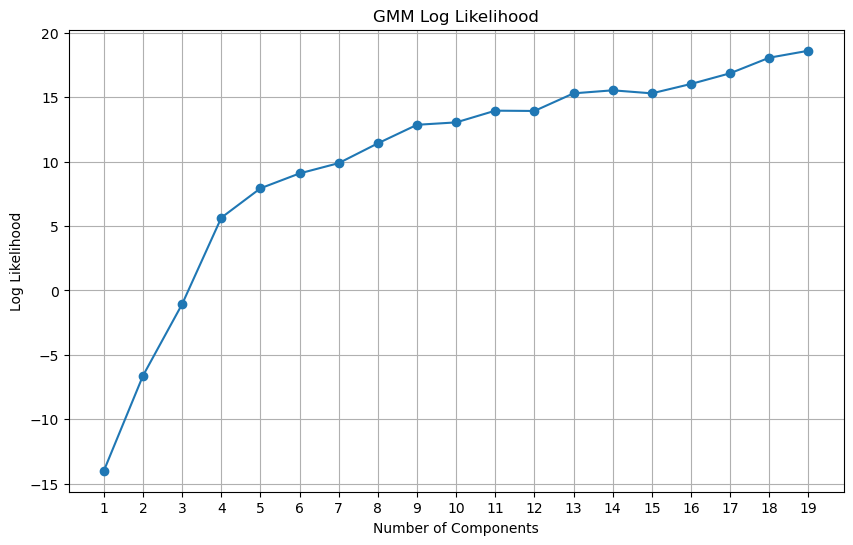

In [31]:
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import numpy as np

# Try a range of components and compute the GMM for each
n_components_range = range(1, 20)
log_likelihoods = []

for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, random_state=42)
    gmm.fit(X_scaled)
    # The higher the log likelihood, the better
    log_likelihoods.append(gmm.score(X_scaled))  # score() returns log likelihood

# Plot the log likelihoods for each number of components
plt.figure(figsize=(10, 6))
plt.plot(n_components_range, log_likelihoods, marker='o')
plt.title('GMM Log Likelihood')
plt.xlabel('Number of Components')
plt.ylabel('Log Likelihood')
plt.grid(True)
plt.xticks(n_components_range)
plt.show()


Homogeneity (GMM): 0.168
Completeness (GMM): 0.635
V-measure (GMM): 0.266
Adjusted Rand Index (GMM): 0.003


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for 

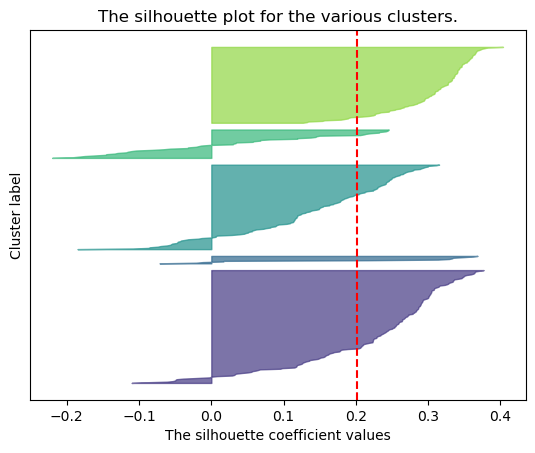

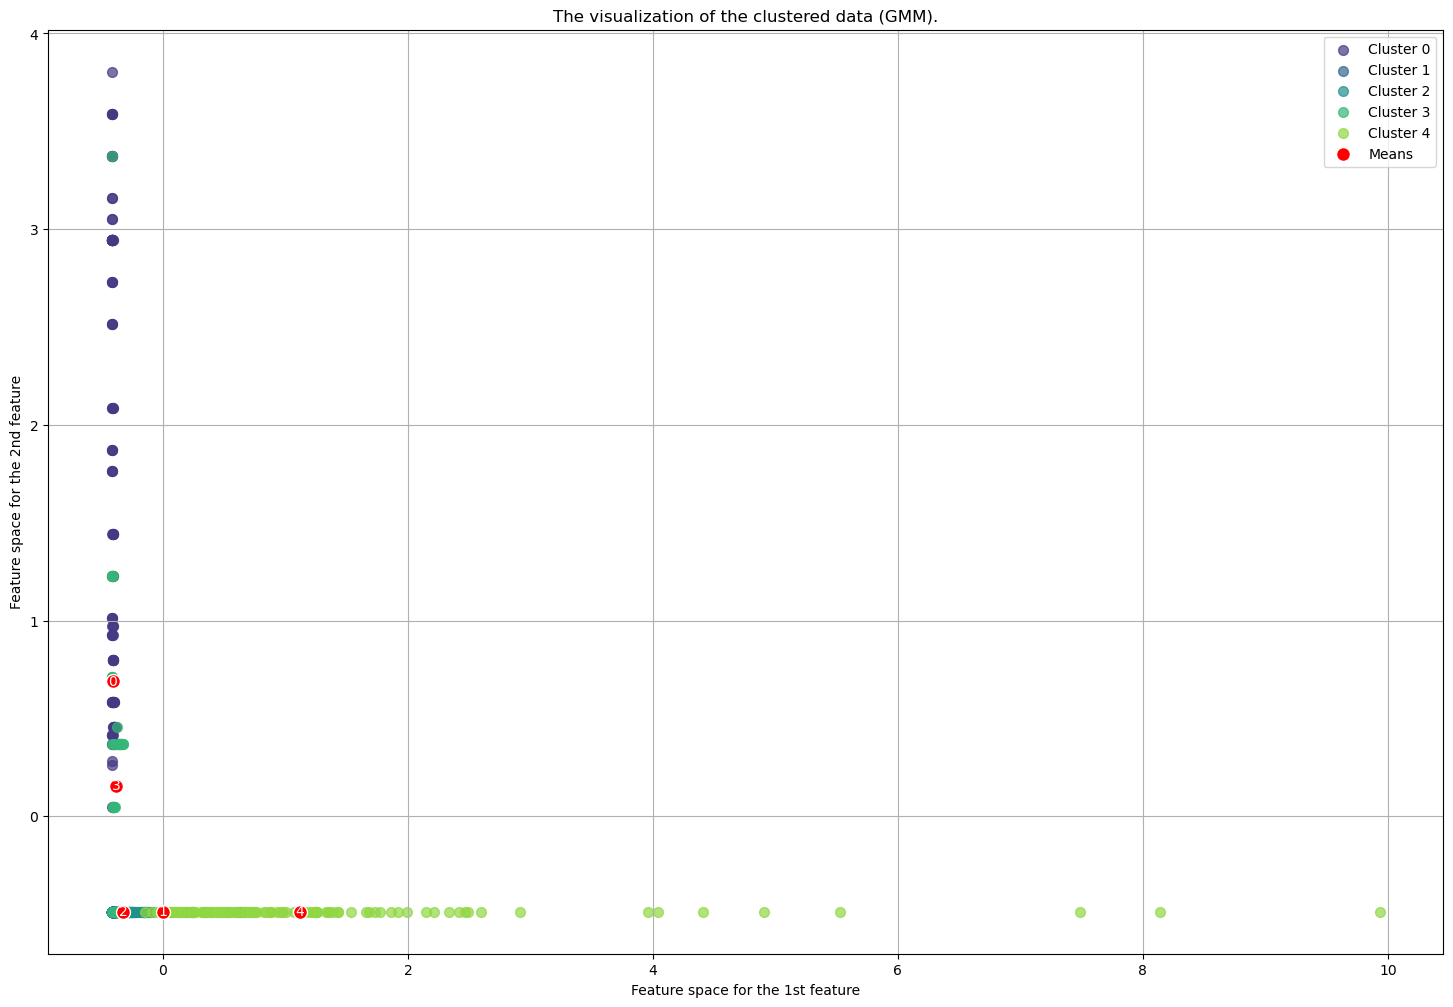

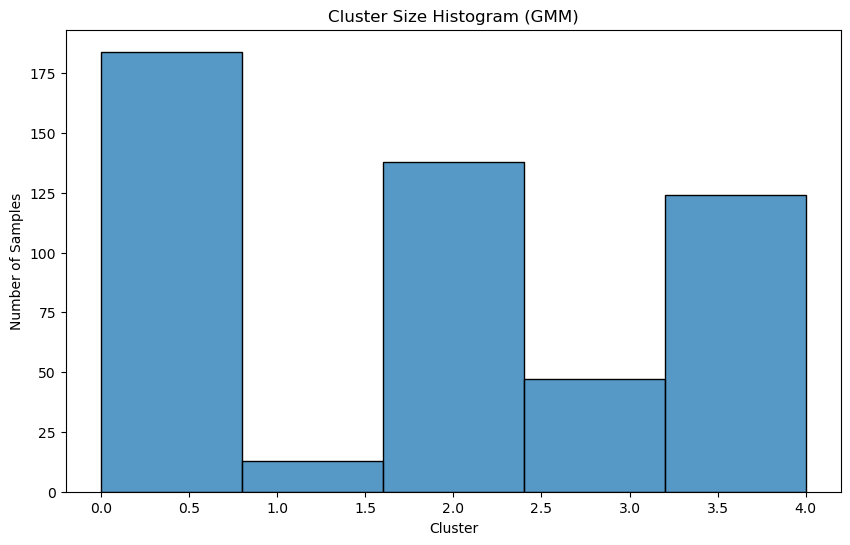

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score


optimal_k = 5
# Fit Gaussian Mixture Model
gmm = GaussianMixture(n_components=optimal_k, random_state=42)
gmm_clusters = gmm.fit_predict(X_scaled)

# Calculate silhouette scores for GMM
gmm_silhouette_avg = silhouette_score(X_scaled, gmm_clusters)
gmm_sample_silhouette_values = silhouette_samples(X_scaled, gmm_clusters)

# Silhouette Score Plot for GMM
fig, ax1 = plt.subplots(1, 1)
y_lower = 10
color_palette = sns.color_palette("viridis", n_colors=optimal_k)

for i in range(optimal_k):
    # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
    ith_cluster_silhouette_values = gmm_sample_silhouette_values[gmm_clusters == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = color_palette[i]
    ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")
ax1.axvline(x=gmm_silhouette_avg, color="red", linestyle="--")
ax1.set_yticks([])

# Scatter Plot for GMM
plt.figure(figsize=(18, 12))

# Scatter plot for each cluster
for i in range(optimal_k):
    cluster_mask = (gmm_clusters == i)
    plt.scatter(X_scaled[cluster_mask, 0], X_scaled[cluster_mask, 1], s=50, c=[color_palette[i]], label=f'Cluster {i}', alpha=0.7)

# Add scatter plot for cluster means
centers = gmm.means_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100, edgecolors='white', zorder=10, label='Means')

# Annotate the cluster means
for i, c in enumerate(centers):
    plt.text(c[0], c[1], str(i), color='white', ha='center', va='center', zorder=11)

plt.title("The visualization of the clustered data (GMM).")
plt.xlabel("Feature space for the 1st feature")
plt.ylabel("Feature space for the 2nd feature")
plt.grid(True)
plt.legend()

# Cluster Size Histogram for GMM
plt.figure(figsize=(10, 6))
sns.histplot(gmm_clusters, kde=False, bins=optimal_k)
plt.title('Cluster Size Histogram (GMM)')
plt.xlabel('Cluster')
plt.ylabel('Number of Samples')

# Calculate Metrics for GMM
gmm_homogeneity = homogeneity_score(y, gmm_clusters)
gmm_completeness = completeness_score(y, gmm_clusters)
gmm_v_measure = v_measure_score(y, gmm_clusters)
gmm_ARI = adjusted_rand_score(y, gmm_clusters)

print(f'Homogeneity (GMM): {gmm_homogeneity:.3f}')
print(f'Completeness (GMM): {gmm_completeness:.3f}')
print(f'V-measure (GMM): {gmm_v_measure:.3f}')
print(f'Adjusted Rand Index (GMM): {gmm_ARI:.3f}')

plt.show()


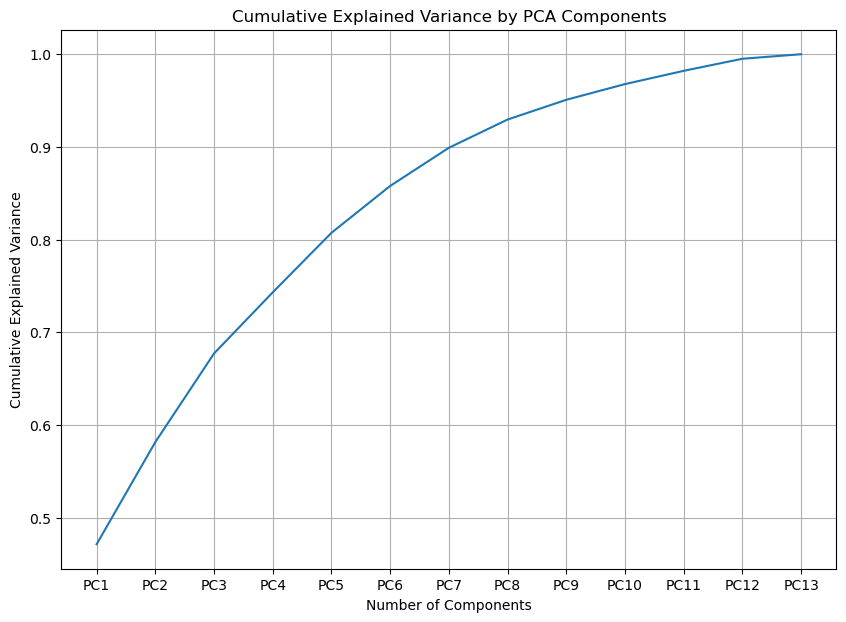

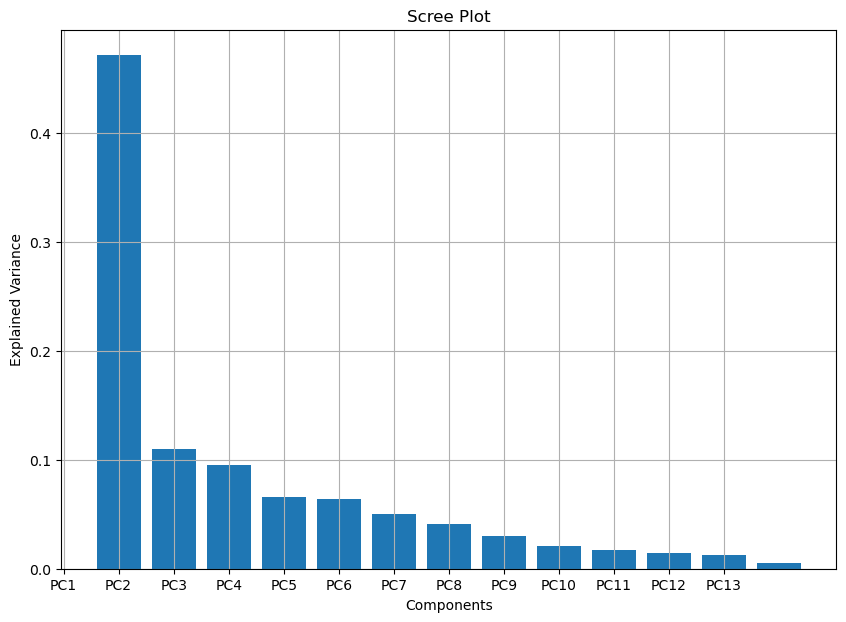

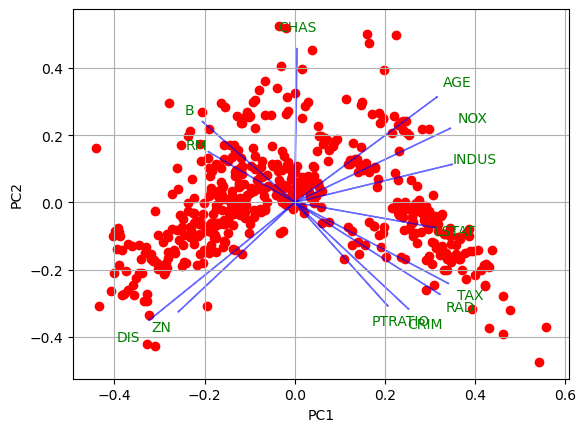

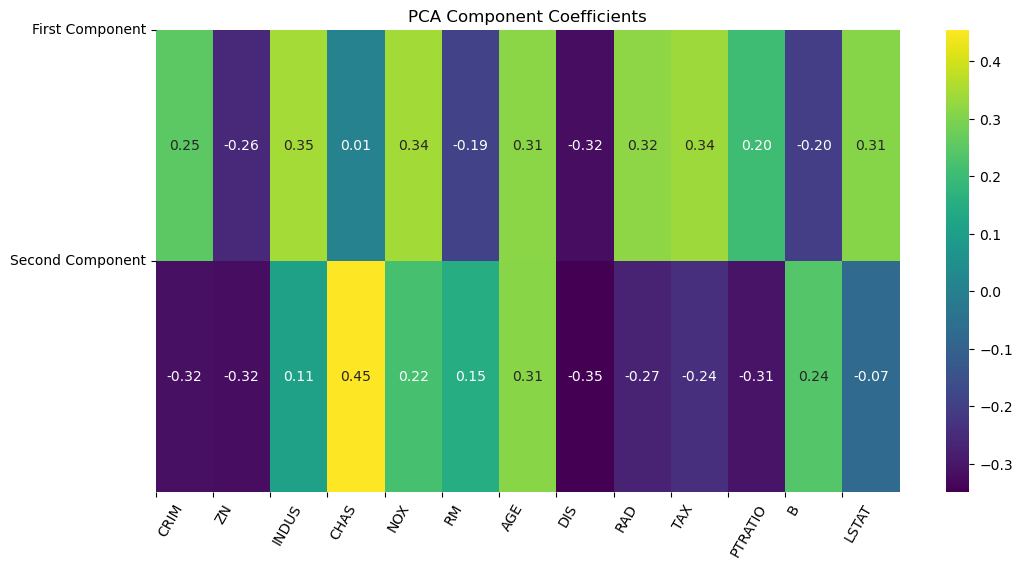

In [41]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Apply PCA
pca = PCA().fit(X_scaled)

# Cumulative Explained Variance Plot
plt.figure(figsize=(10, 7))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.xticks(ticks=range(len(pca.explained_variance_ratio_)), labels=[f'PC{i+1}' for i in range(len(pca.explained_variance_ratio_))])
plt.title('Cumulative Explained Variance by PCA Components')
plt.grid(True)
plt.show()

# Scree Plot
plt.figure(figsize=(10, 7))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.xlabel('Components')
plt.ylabel('Explained Variance')
plt.xticks(ticks=range(len(pca.explained_variance_ratio_)), labels=[f'PC{i+1}' for i in range(len(pca.explained_variance_ratio_))])
plt.title('Scree Plot')
plt.grid(True)
plt.show()

# Biplot (assumes 2 principal components)
def biplot(score, coeff, labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    
    plt.scatter(xs * scalex, ys * scaley, c = 'r')
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color = 'b', alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')

    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

# Only plot the first two pcs
pca_2 = PCA(n_components=2)
X_pca_2 = pca_2.fit_transform(X_scaled)
biplot(X_pca_2[:,0:2], np.transpose(pca_2.components_[0:2, :]), labels=X.columns)
plt.show()

# Coefficient Plot for the first 2 principal components
plt.figure(figsize=(12, 6))
feature_names = list(X.columns)
sns.heatmap(pca.components_[0:2], annot=True, cmap='viridis', fmt=".2f")
plt.yticks([0, 1], ['First Component', 'Second Component'], rotation=360)
plt.xticks(ticks=np.arange(len(feature_names)), labels=feature_names, rotation=60, ha='left')
plt.title('PCA Component Coefficients')
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

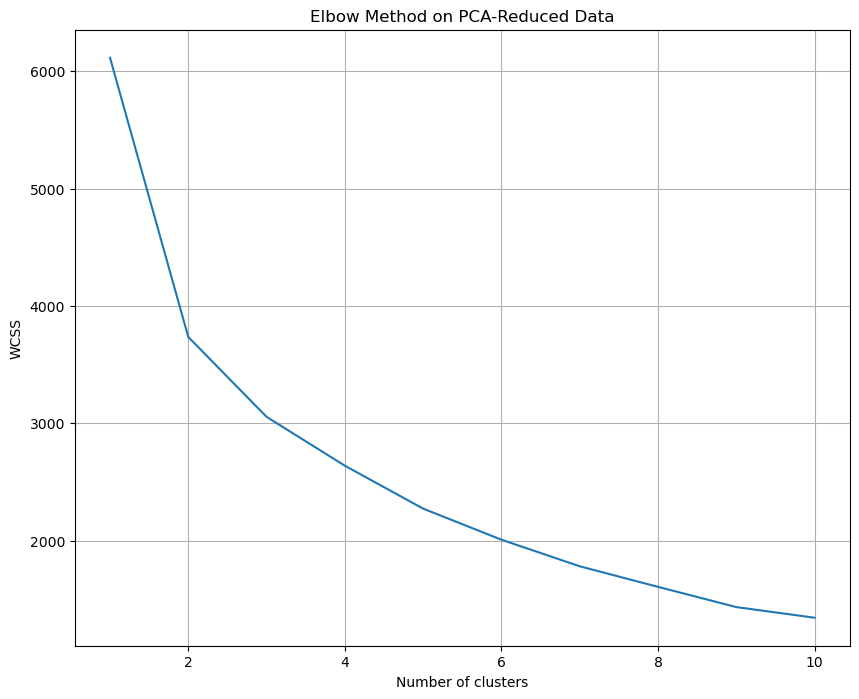

In [43]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Apply PCA with 8 components
pca_8 = PCA(n_components=8)
X_pca_8 = pca_8.fit_transform(X_scaled)

# Use the Elbow Method on the PCA-reduced data
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_pca_8)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method graph with a grid
plt.figure(figsize=(10, 8))  # This line is added to adjust the figure size for better readability
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method on PCA-Reduced Data')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within Cluster Sum of Squares
plt.grid(True)  # This adds a grid to the plot
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


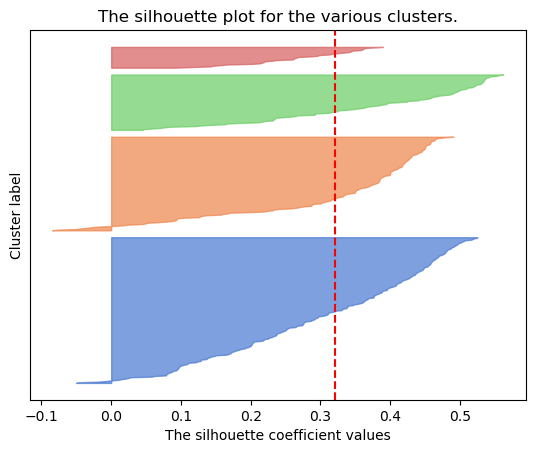

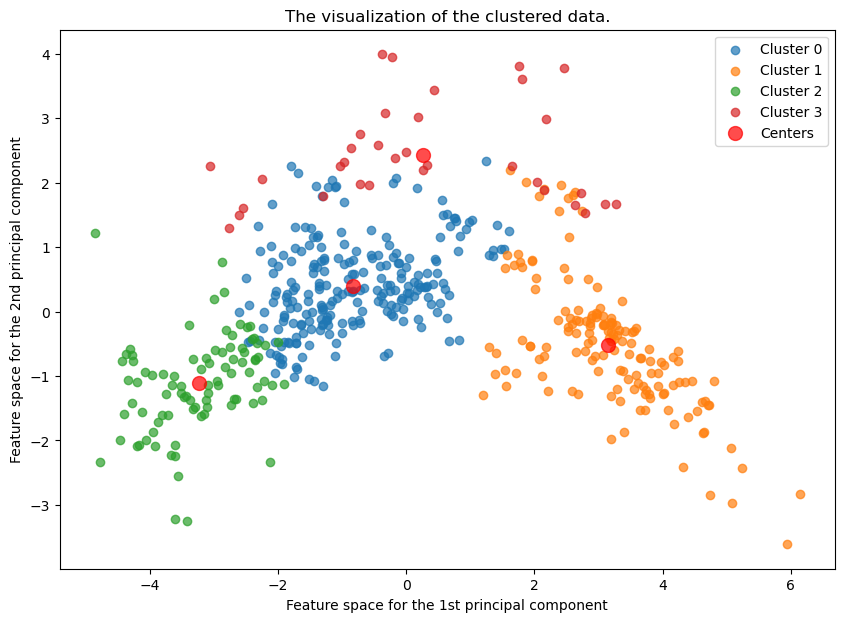

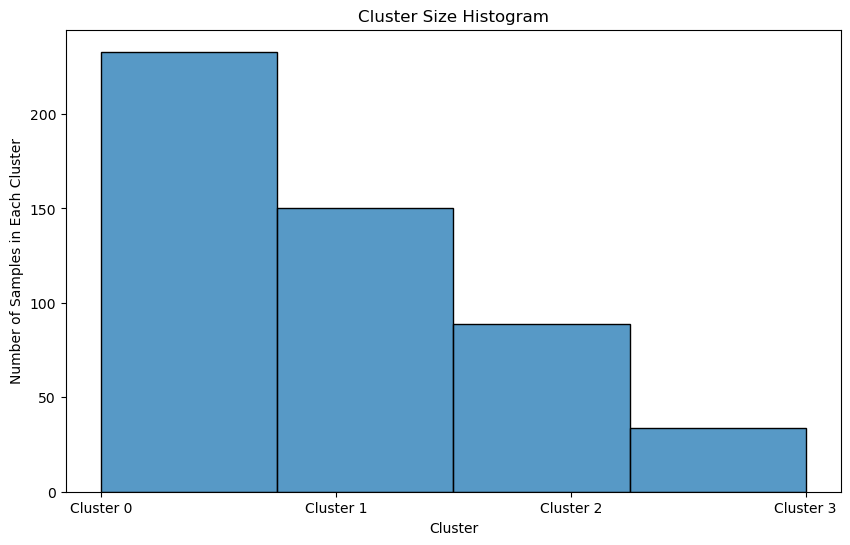

Homogeneity: 0.150
Completeness: 0.648
V-measure: 0.243
Adjusted Rand Index (ARI): 0.003


In [47]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_pca_8)  # Make sure to use the PCA-reduced data

# Calculate silhouette scores
silhouette_avg = silhouette_score(X_pca_8, clusters)
sample_silhouette_values = silhouette_samples(X_pca_8, clusters)

# Silhouette Score Plot
fig, ax1 = plt.subplots(1, 1)
y_lower = 10
color_palette = sns.color_palette("muted", optimal_k)  # Adjusted the palette for the number of clusters

for i in range(optimal_k):
    ith_cluster_silhouette_values = sample_silhouette_values[clusters == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = color_palette[i]
    ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
ax1.set_yticks([])  # Clear the y-axis labels

plt.show()

# Scatter plot for each cluster
plt.figure(figsize=(10, 7))
palette = sns.color_palette("viridis", n_colors=optimal_k)

for i in range(optimal_k):
    cluster_mask = (clusters == i)
    plt.scatter(X_pca_8[cluster_mask, 0], X_pca_8[cluster_mask, 1], label=f'Cluster {i}', alpha=0.7)

# Add cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100, label='Centers', alpha=0.7)

plt.title("The visualization of the clustered data.")
plt.xlabel("Feature space for the 1st principal component")
plt.ylabel("Feature space for the 2nd principal component")
plt.legend()
plt.show()

# Calculate Metrics
# Convert y to integers if it's not already (necessary for homogeneity, completeness, and ARI)
# This assumes y is your target variable from the original dataset
if not np.issubdtype(y.dtype, np.integer):
    y_integer_encoded = LabelEncoder().fit_transform(y)  # Encode non-integer labels to integers
else:
    y_integer_encoded = y

    
    # Cluster Size Histogram
plt.figure(figsize=(10, 6))
sns.histplot(clusters, kde=False, bins=optimal_k)
plt.title('Cluster Size Histogram')
plt.xlabel('Cluster')
plt.ylabel('Number of Samples in Each Cluster')
plt.xticks(ticks=range(optimal_k), labels=[f'Cluster {i}' for i in range(optimal_k)])
plt.show()


homogeneity = homogeneity_score(y_integer_encoded, clusters)
completeness = completeness_score(y_integer_encoded, clusters)
v_measure = v_measure_score(y_integer_encoded, clusters)
ARI = adjusted_rand_score(y_integer_encoded, clusters)

print(f'Homogeneity: {homogeneity:.3f}')
print(f'Completeness: {completeness:.3f}')
print(f'V-measure: {v_measure:.3f}')
print(f'Adjusted Rand Index (ARI): {ARI:.3f}')


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

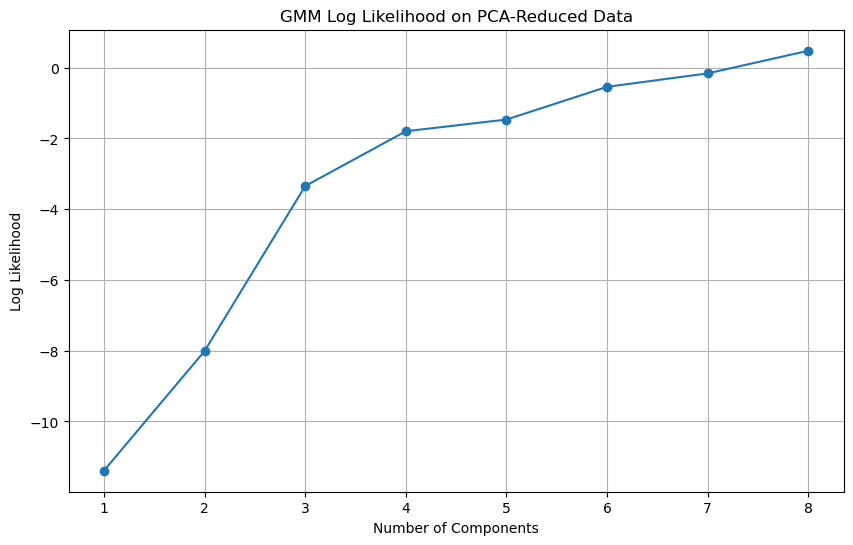

In [49]:
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

# Try a range of components and compute the GMM for each on the reduced dimensions dataset
n_components_range = range(1, 9)  # Limit to 8 components since we have reduced our dataset to 8 PCs
log_likelihoods = []

for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, random_state=42)
    gmm.fit(X_pca_8)  # Fit GMM on the PCA-reduced data
    # The higher the log likelihood, the better
    log_likelihoods.append(gmm.score(X_pca_8))  # score() returns log likelihood

# Plot the log likelihoods for each number of components
plt.figure(figsize=(10, 6))
plt.plot(n_components_range, log_likelihoods, marker='o')
plt.title('GMM Log Likelihood on PCA-Reduced Data')
plt.xlabel('Number of Components')
plt.ylabel('Log Likelihood')
plt.grid(True)
plt.xticks(n_components_range)
plt.show()


Homogeneity (GMM): 0.134
Completeness (GMM): 0.635
V-measure (GMM): 0.221
Adjusted Rand Index (GMM): 0.002


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


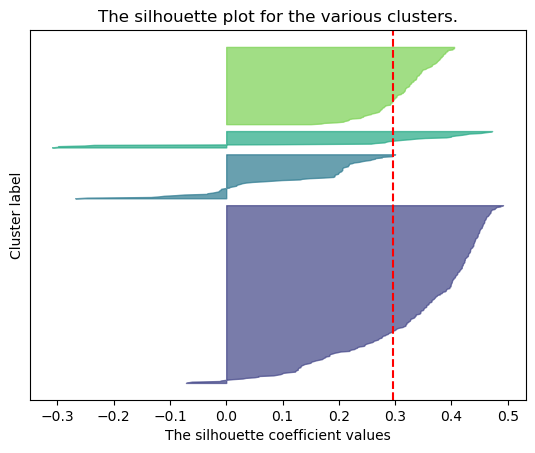

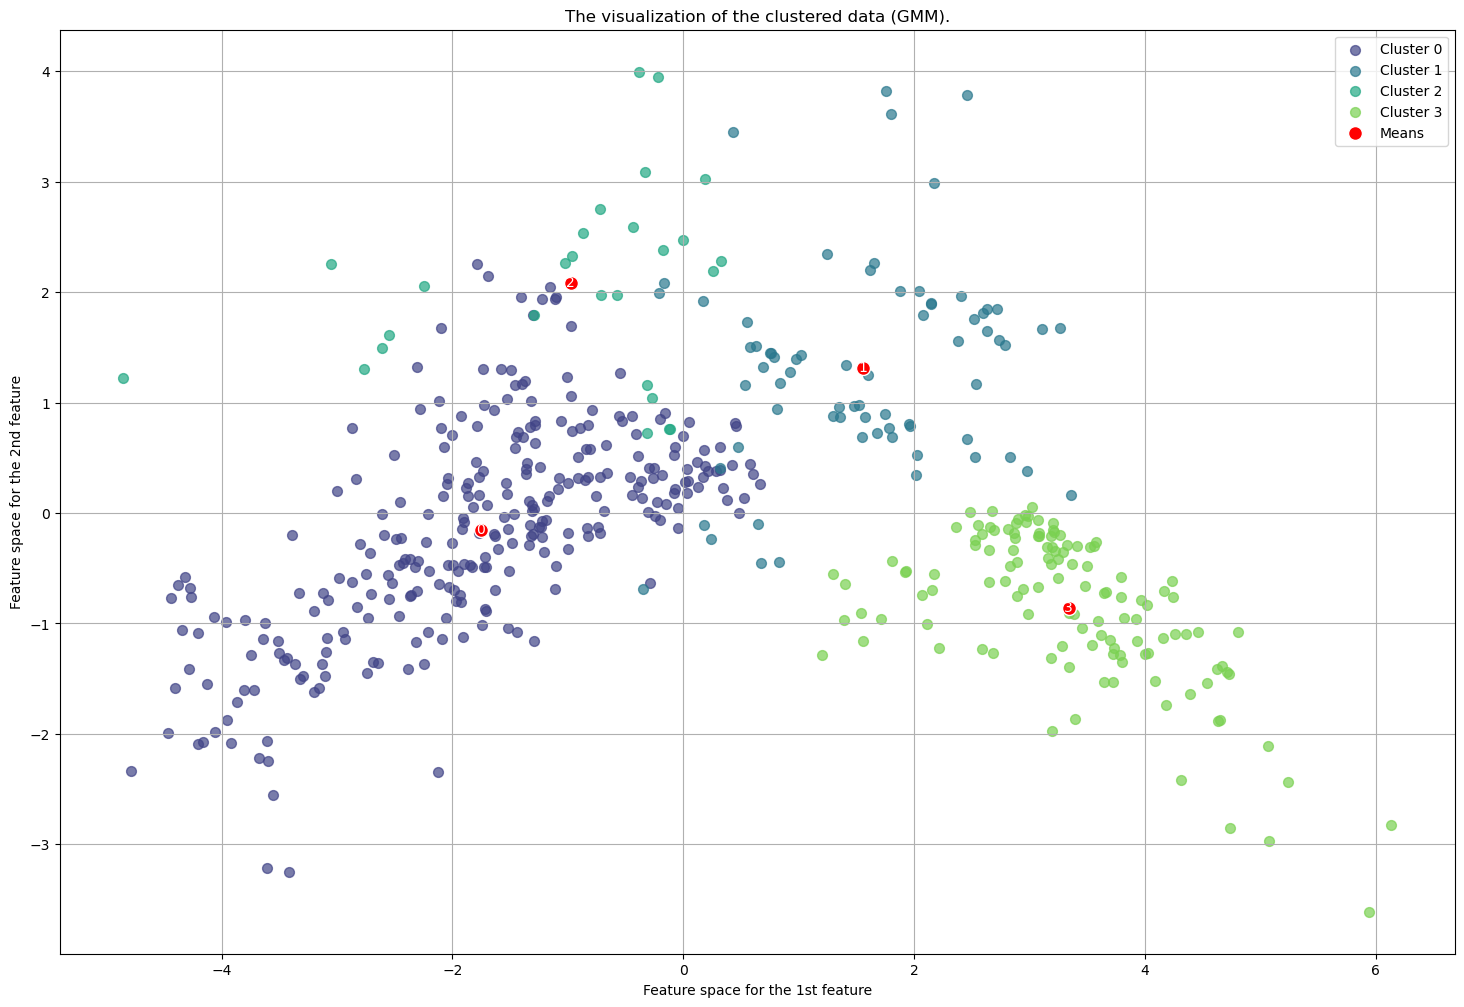

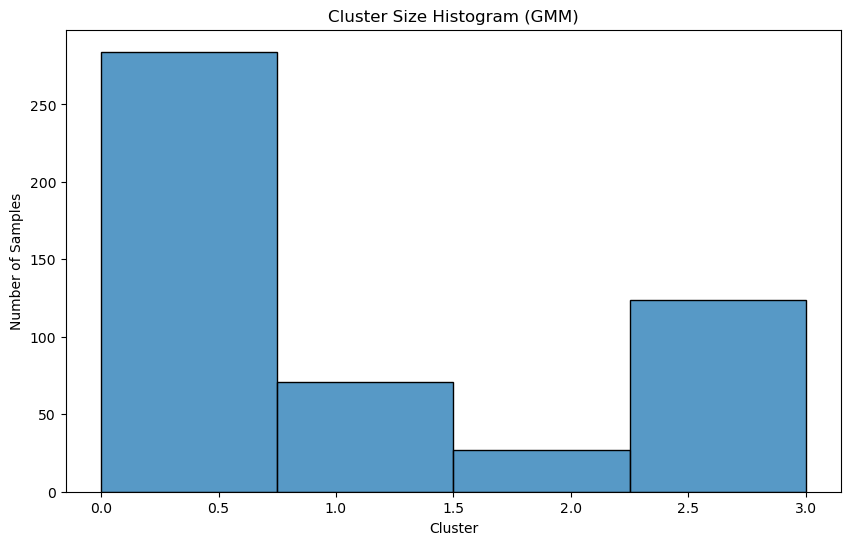

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score
from sklearn.preprocessing import LabelEncoder

# Apply the Gaussian Mixture Model
optimal_k = 4  # Number of clusters you've decided
gmm = GaussianMixture(n_components=optimal_k, random_state=42)
gmm_clusters = gmm.fit_predict(X_pca_8)  # Using the PCA-reduced data here

# Calculate silhouette scores for GMM
gmm_silhouette_avg = silhouette_score(X_pca_8, gmm_clusters)
gmm_sample_silhouette_values = silhouette_samples(X_pca_8, gmm_clusters)

# Silhouette Score Plot for GMM
fig, ax1 = plt.subplots(1, 1)
y_lower = 10
color_palette = sns.color_palette("viridis", n_colors=optimal_k)

for i in range(optimal_k):
    # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
    ith_cluster_silhouette_values = gmm_sample_silhouette_values[gmm_clusters == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = color_palette[i]
    ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")
ax1.axvline(x=gmm_silhouette_avg, color="red", linestyle="--")
ax1.set_yticks([])

# Scatter Plot for GMM
plt.figure(figsize=(18, 12))

# Scatter plot for each cluster
for i in range(optimal_k):
    cluster_mask = (gmm_clusters == i)
    plt.scatter(X_pca_8[cluster_mask, 0], X_pca_8[cluster_mask, 1], s=50, c=[color_palette[i]], label=f'Cluster {i}', alpha=0.7)

# Add scatter plot for cluster means
centers = gmm.means_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100, edgecolors='white', zorder=10, label='Means')

# Annotate the cluster means
for i, c in enumerate(centers):
    plt.text(c[0], c[1], str(i), color='white', ha='center', va='center', zorder=11)

plt.title("The visualization of the clustered data (GMM).")
plt.xlabel("Feature space for the 1st feature")
plt.ylabel("Feature space for the 2nd feature")
plt.grid(True)
plt.legend()

# Cluster Size Histogram for GMM
plt.figure(figsize=(10, 6))
sns.histplot(gmm_clusters, kde=False, bins=optimal_k)
plt.title('Cluster Size Histogram (GMM)')
plt.xlabel('Cluster')
plt.ylabel('Number of Samples')

# Assuming 'y' is a categorical variable, we need to encode it before using clustering metrics
if not np.issubdtype(y.dtype, np.integer):
    y_encoded = LabelEncoder().fit_transform(y)
else:
    y_encoded = y

# Calculate Metrics for GMM
gmm_homogeneity = homogeneity_score(y_encoded, gmm_clusters)
gmm_completeness = completeness_score(y_encoded, gmm_clusters)
gmm_v_measure = v_measure_score(y_encoded, gmm_clusters)
gmm_ARI = adjusted_rand_score(y_encoded, gmm_clusters)

print(f'Homogeneity (GMM): {gmm_homogeneity:.3f}')
print(f'Completeness (GMM): {gmm_completeness:.3f}')
print(f'V-measure (GMM): {gmm_v_measure:.3f}')
print(f'Adjusted Rand Index (GMM): {gmm_ARI:.3f}')

plt.show()


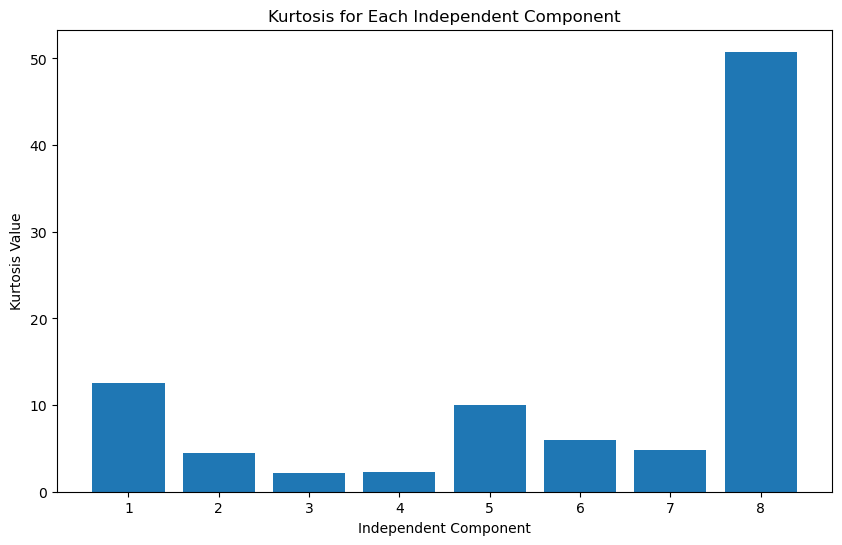

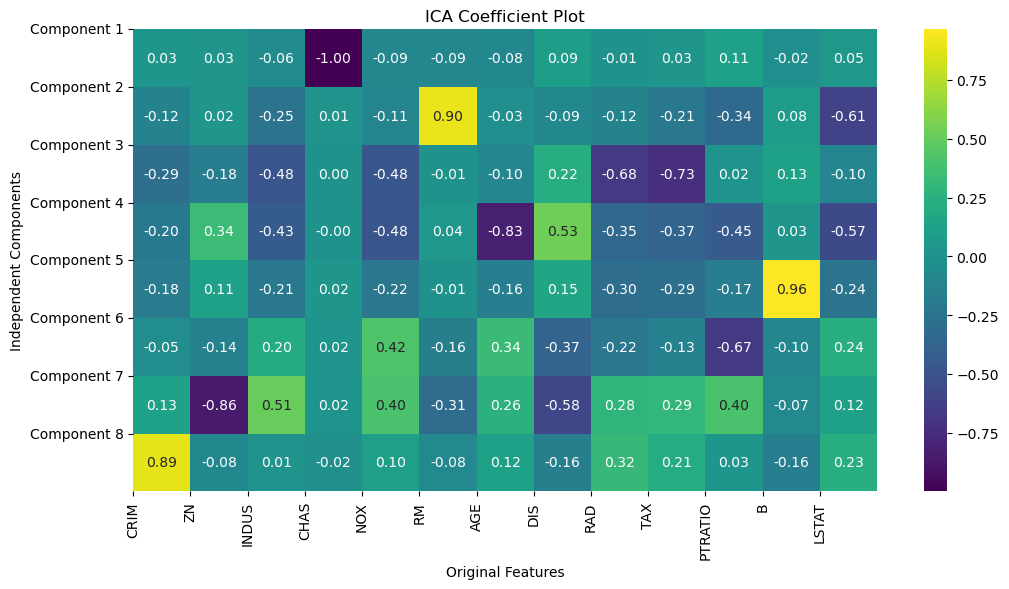

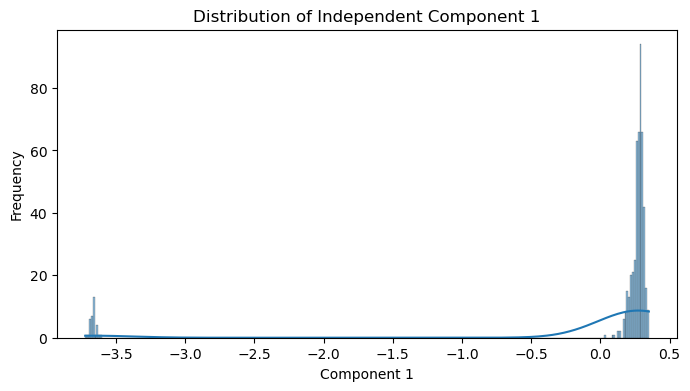

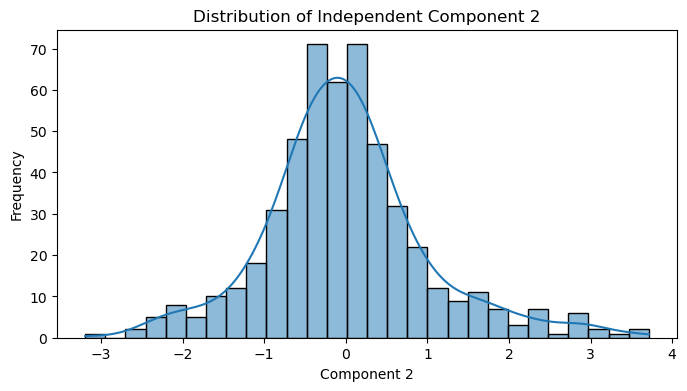

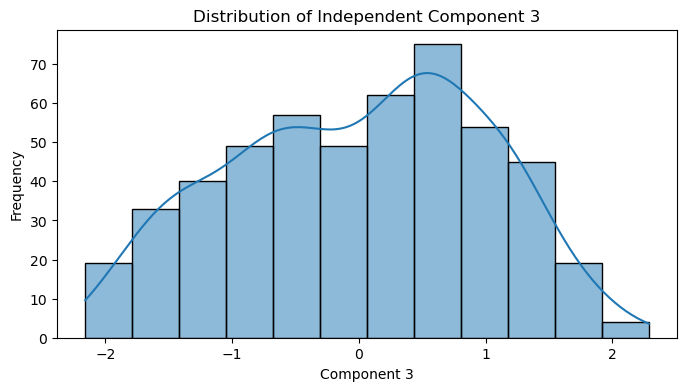

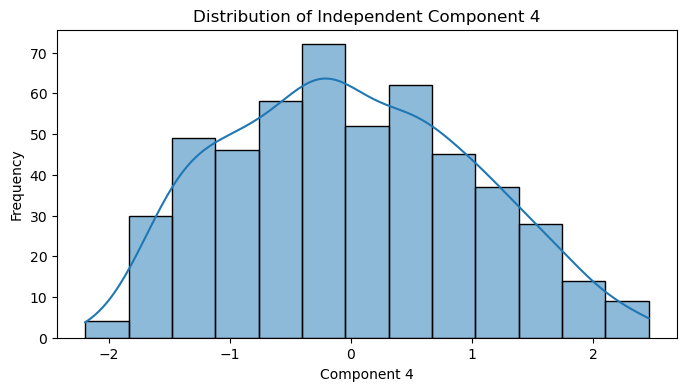

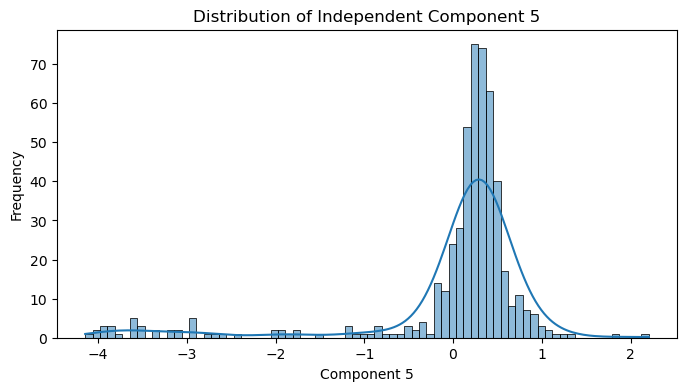

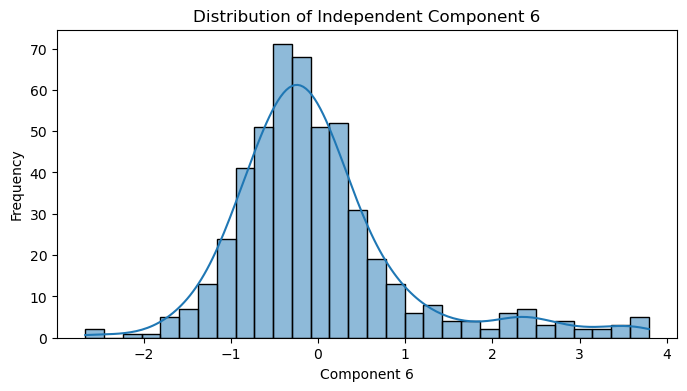

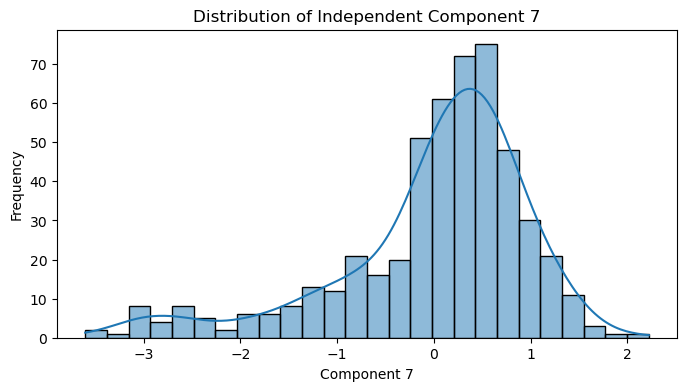

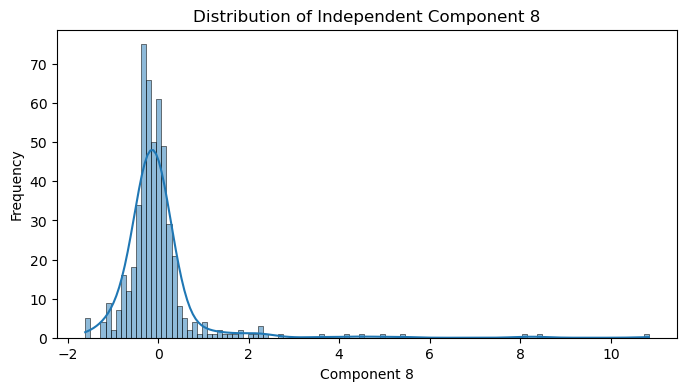

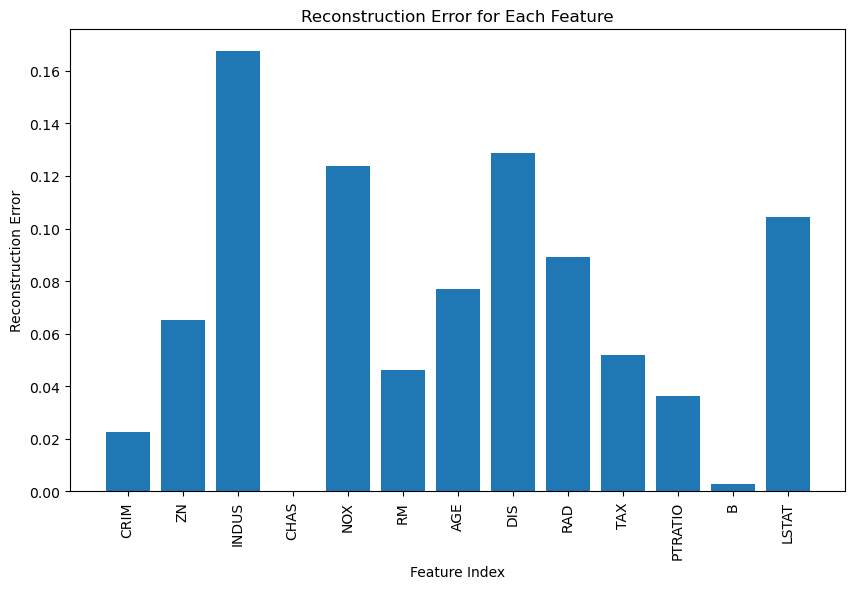

In [60]:
from sklearn.decomposition import FastICA
from scipy.stats import kurtosis

# Apply ICA with the number of components you wish to extract
ica = FastICA(n_components=n_ica_components, random_state=42)
X_ica = ica.fit_transform(X_scaled)  # Fit ICA on the scaled data
# Calculate kurtosis for each independent component
ica_kurtosis = kurtosis(X_ica, fisher=False)  # Fisher=False will give the regular, not the Fisher-adjusted, kurtosis value.

# Plotting the kurtosis values
plt.figure(figsize=(10, 6))
plt.bar(range(1, n_ica_components+1), ica_kurtosis)
plt.title('Kurtosis for Each Independent Component')
plt.xlabel('Independent Component')
plt.ylabel('Kurtosis Value')
plt.show()
# Coefficient Plot
plt.figure(figsize=(12, 6))
sns.heatmap(ica.mixing_.T, annot=True, cmap='viridis', fmt=".2f")
plt.title('ICA Coefficient Plot')
plt.xlabel('Original Features')
plt.xticks(ticks=np.arange(X.shape[1]), labels=bh_data.drop('MEDV', axis=1).columns, rotation=90)
plt.ylabel('Independent Components')
plt.yticks(ticks=np.arange(ica.n_components), labels=[f'Component {i+1}' for i in range(ica.n_components)], rotation=0)
plt.show()


# Distribution of Each Independent Component
for i, component in enumerate(X_ica.T, 1):
    plt.figure(figsize=(8, 4))
    sns.histplot(component, kde=True)
    plt.title(f'Distribution of Independent Component {i}')
    plt.xlabel(f'Component {i}')
    plt.ylabel('Frequency')
    plt.show()

# Reconstruction Error Plot
reconstruction_error = np.mean((X_scaled - ica.inverse_transform(X_ica)) ** 2, axis=0)
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), reconstruction_error)
plt.title('Reconstruction Error for Each Feature')
plt.xlabel('Feature Index')
plt.xticks(ticks=np.arange(X.shape[1]), labels=bh_data.drop('MEDV', axis=1).columns, rotation=90)
plt.ylabel('Reconstruction Error')
plt.show()


In [63]:

# Select components 1, 5, 7, 8 (remember Python is zero-indexed so we adjust by 1)
selected_components = X_ica[:, [0, 4, 6, 7]]

# Create a new DataFrame with the selected components
selected_ica_df = pd.DataFrame(data=selected_components, columns=['Component_1', 'Component_5', 'Component_7', 'Component_8'])

# Display the head of the new DataFrame
print(selected_ica_df.head())




   Component_1  Component_5  Component_7  Component_8
0     0.313101     0.495489    -0.265617     0.176520
1     0.279460     0.298985     0.036758     0.004320
2     0.284489     0.150891     0.401748    -0.039359
3     0.275886     0.114674     0.495548     0.129277
4     0.272682     0.086433     0.149442     0.144480


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

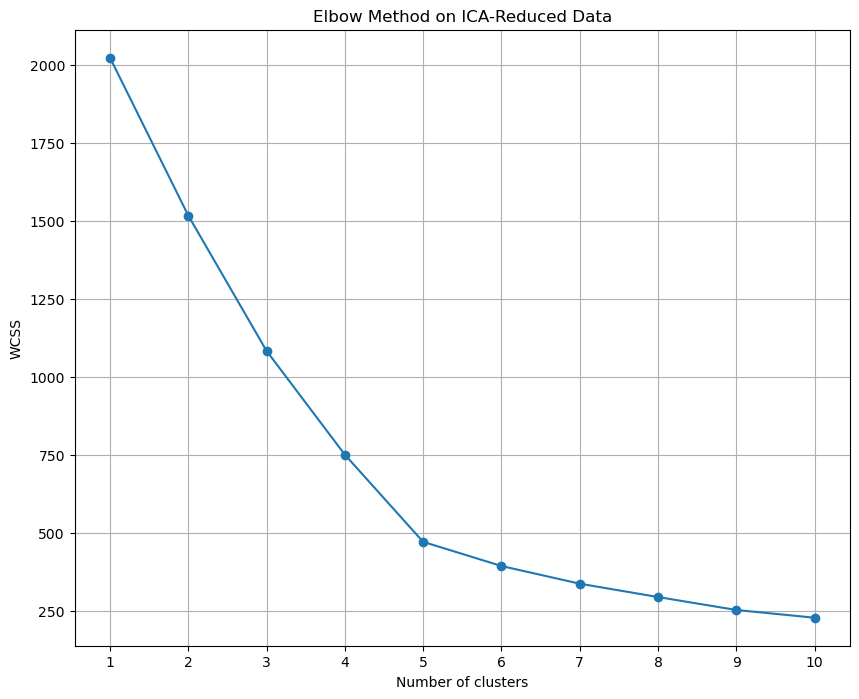

In [64]:

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# We assume 'selected_ica_df' is your ICA-reduced dataset with the components you selected
X_ica_selected = selected_ica_df.values  # Convert the DataFrame to a NumPy array for fitting KMeans

# Use the Elbow Method on the ICA-reduced data
wcss = []  # List to hold the within-cluster sum of squares for each number of clusters
for i in range(1, 11):  # Testing for 1 to 10 clusters
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_ica_selected)  # Fit KMeans on the ICA-reduced data
    wcss.append(kmeans.inertia_)  # Append the inertia (WCSS) to the list

# Plotting the Elbow Method graph with a grid
plt.figure(figsize=(10, 8))  # Adjust the figure size if necessary
plt.plot(range(1, 11), wcss, marker='o')  # Add markers for each point
plt.title('Elbow Method on ICA-Reduced Data')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within Cluster Sum of Squares
plt.grid(True)  # Add a grid to the plot
plt.xticks(range(1, 11))  # Ensure x-axis ticks show every number of clusters tested
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


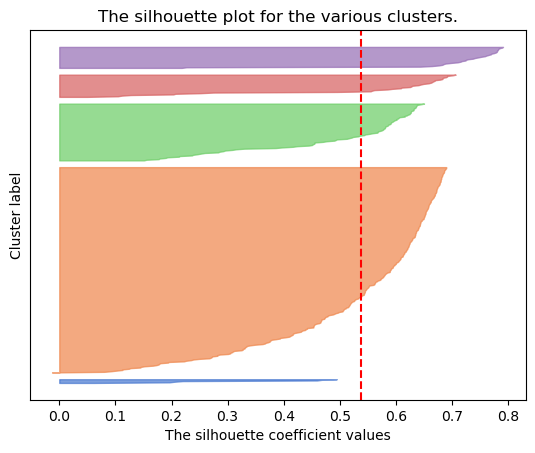

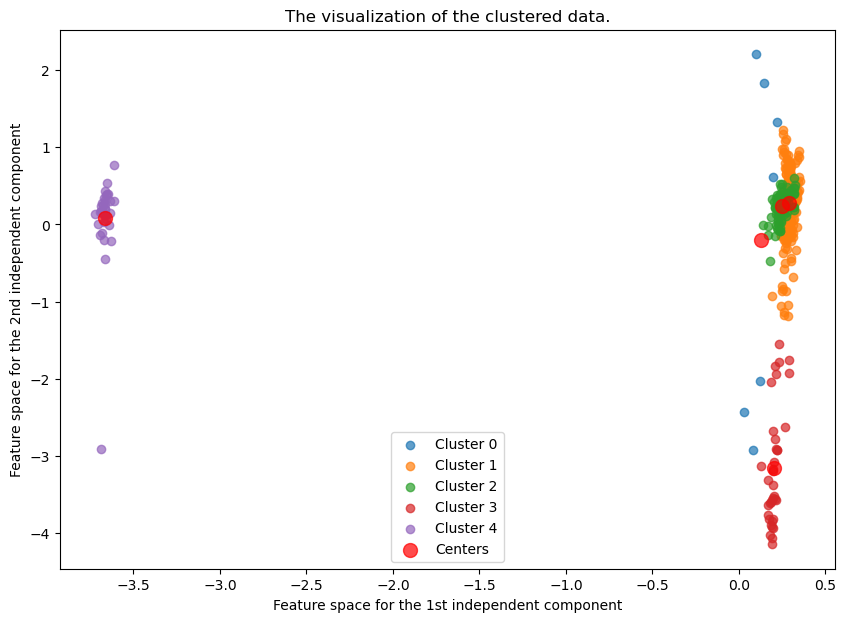

Homogeneity: 0.127
Completeness: 0.649
V-measure: 0.212
Adjusted Rand Index (ARI): 0.001


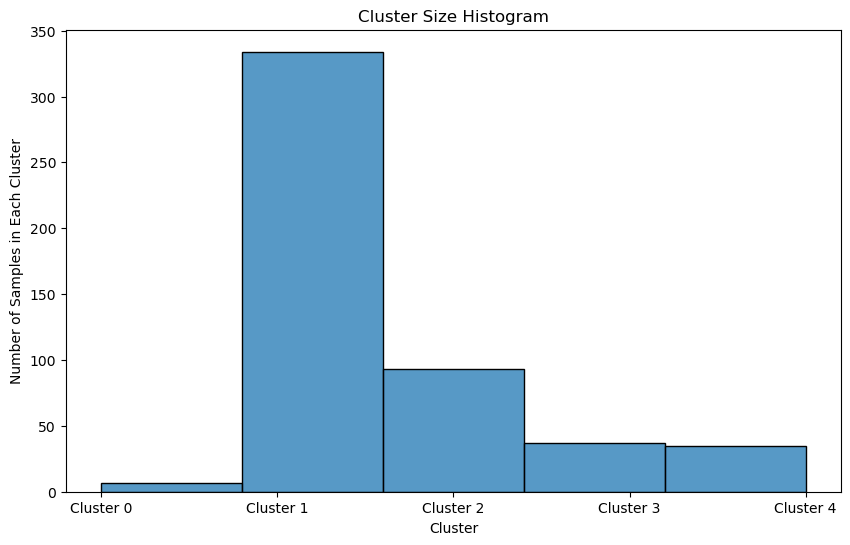

In [71]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# ICA reduced data
X_ica_selected = selected_ica_df.values

# Optimal number of clusters found from previous analysis
optimal_k = 5

# Apply KMeans
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_ica_selected)  # Apply it on the ICA-reduced data

# Calculate silhouette scores
silhouette_avg = silhouette_score(X_ica_selected, clusters)
sample_silhouette_values = silhouette_samples(X_ica_selected, clusters)

# Silhouette Score Plot
fig, ax1 = plt.subplots(1, 1)
y_lower = 10
color_palette = sns.color_palette("muted", optimal_k)

for i in range(optimal_k):
    ith_cluster_silhouette_values = sample_silhouette_values[clusters == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = color_palette[i]
    ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)
    y_lower = y_upper + 10

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
ax1.set_yticks([])

plt.show()

# Scatter plot for each cluster
plt.figure(figsize=(10, 7))
palette = sns.color_palette("viridis", n_colors=optimal_k)

for i in range(optimal_k):
    cluster_mask = (clusters == i)
    plt.scatter(selected_components[cluster_mask, 0], selected_components[cluster_mask, 1], label=f'Cluster {i}', alpha=0.7)

# Add cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100, label='Centers', alpha=0.7)

plt.title("The visualization of the clustered data.")
plt.xlabel("Feature space for the 1st independent component")
plt.ylabel("Feature space for the 2nd independent component")
plt.legend()
plt.show()

# Calculate Metrics
# Convert y to integers if it's not already (necessary for homogeneity, completeness, and ARI)
if not np.issubdtype(y.dtype, np.integer):
    y_integer_encoded = LabelEncoder().fit_transform(y)  
else:
    y_integer_encoded = y

homogeneity = homogeneity_score(y_integer_encoded, clusters)
completeness = completeness_score(y_integer_encoded, clusters)
v_measure = v_measure_score(y_integer_encoded, clusters)
ARI = adjusted_rand_score(y_integer_encoded, clusters)

print(f'Homogeneity: {homogeneity:.3f}')
print(f'Completeness: {completeness:.3f}')
print(f'V-measure: {v_measure:.3f}')
print(f'Adjusted Rand Index (ARI): {ARI:.3f}')

# Cluster Size Histogram
plt.figure(figsize=(10, 6))
sns.histplot(clusters, kde=False, bins=optimal_k)
plt.title('Cluster Size Histogram')
plt.xlabel('Cluster')
plt.ylabel('Number of Samples in Each Cluster')
plt.xticks(ticks=range(optimal_k), labels=[f'Cluster {i}' for i in range(optimal_k)])
plt.show()



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

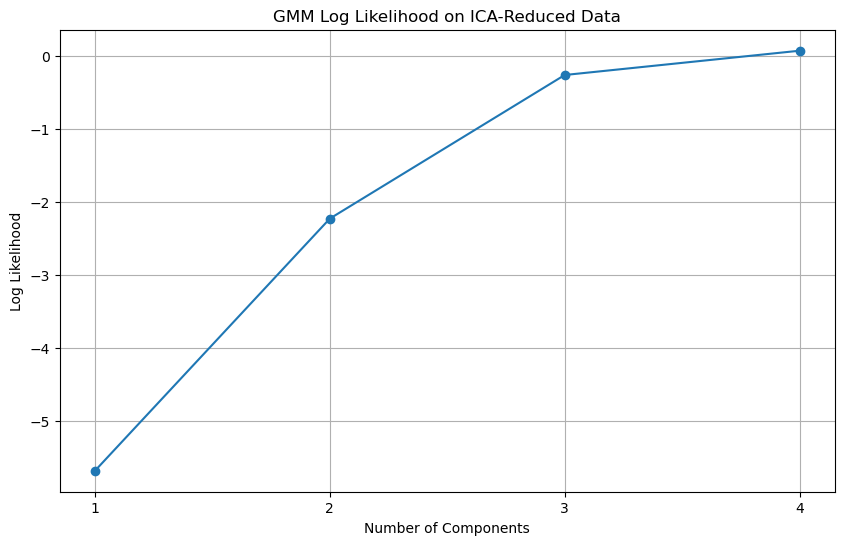

In [72]:
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

# We will check for the number of components from 1 to the number of selected components (which is 4)
n_components_range = range(1, len(selected_ica_df.columns) + 1)
log_likelihoods = []

for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, random_state=42)
    gmm.fit(selected_ica_df)  # Fit GMM on the ICA-reduced data
    log_likelihoods.append(gmm.score(selected_ica_df))  # score() returns the log likelihood

# Plot the log likelihoods for each number of components
plt.figure(figsize=(10, 6))
plt.plot(n_components_range, log_likelihoods, marker='o')
plt.title('GMM Log Likelihood on ICA-Reduced Data')
plt.xlabel('Number of Components')
plt.ylabel('Log Likelihood')
plt.grid(True)
plt.xticks(n_components_range)
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


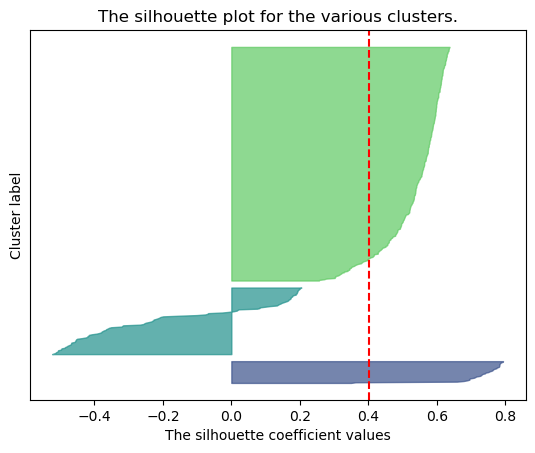

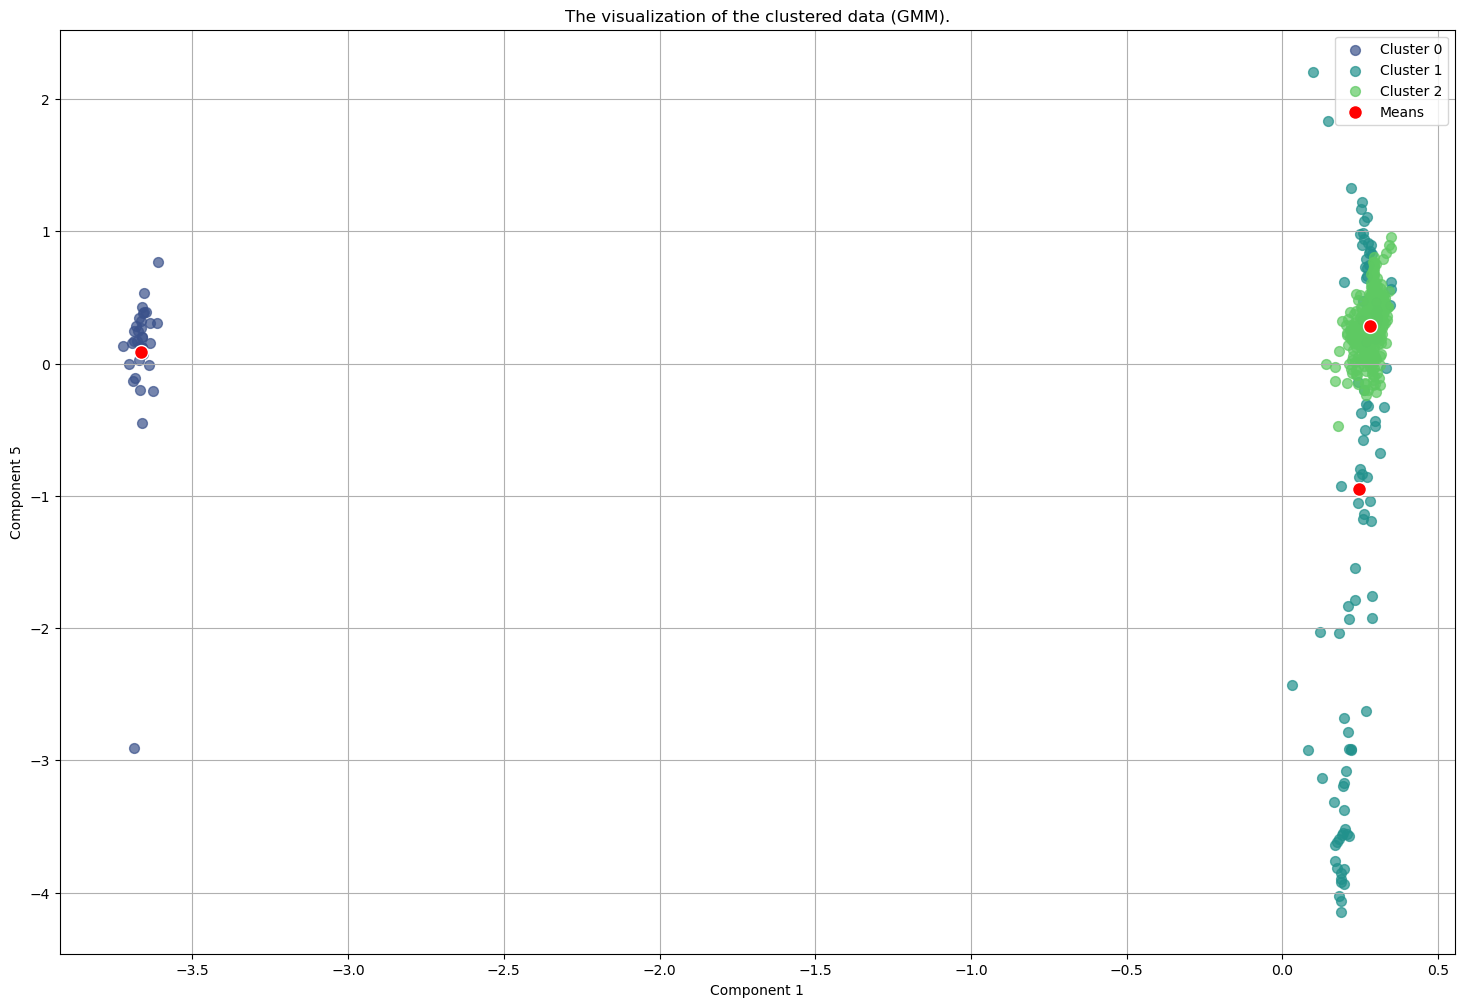

Homogeneity (GMM): 0.096
Completeness (GMM): 0.669
V-measure (GMM): 0.167
Adjusted Rand Index (GMM): 0.002


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarni

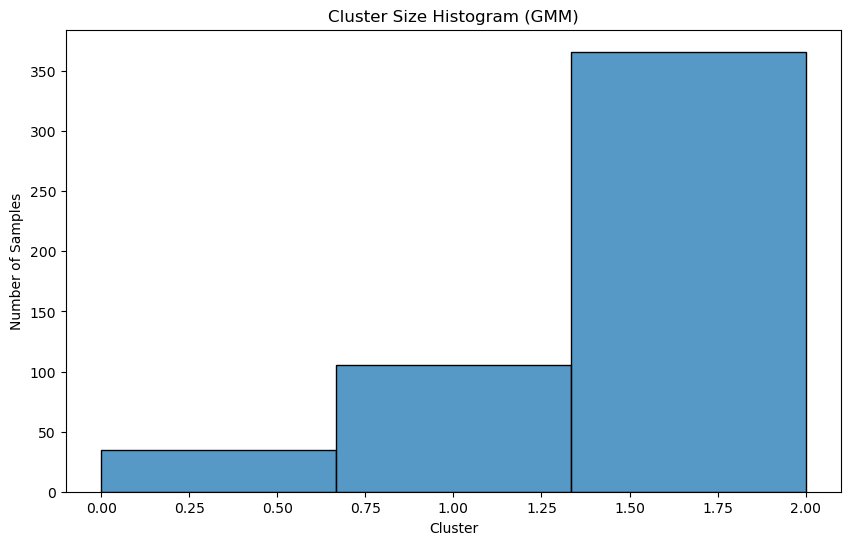

In [73]:
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score
from sklearn.preprocessing import LabelEncoder

# Apply the Gaussian Mixture Model
optimal_k = 3  # Number of clusters you've decided based on your analysis
gmm = GaussianMixture(n_components=optimal_k, random_state=42)
gmm_clusters = gmm.fit_predict(selected_ica_df)  # Using the ICA-reduced data

# Calculate silhouette scores for GMM
gmm_silhouette_avg = silhouette_score(selected_ica_df, gmm_clusters)
gmm_sample_silhouette_values = silhouette_samples(selected_ica_df, gmm_clusters)

# Silhouette Score Plot for GMM
fig, ax1 = plt.subplots(1, 1)
y_lower = 10
color_palette = sns.color_palette("viridis", n_colors=optimal_k)

for i in range(optimal_k):
    ith_cluster_silhouette_values = gmm_sample_silhouette_values[gmm_clusters == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = color_palette[i]
    ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")
ax1.axvline(x=gmm_silhouette_avg, color="red", linestyle="--")
ax1.set_yticks([])  # Clear the y-axis labels

plt.show()

# Scatter Plot for GMM
plt.figure(figsize=(18, 12))

# Scatter plot for each cluster
for i in range(optimal_k):
    cluster_mask = (gmm_clusters == i)
    plt.scatter(selected_ica_df.loc[cluster_mask, 'Component_1'], selected_ica_df.loc[cluster_mask, 'Component_5'], 
                s=50, c=[color_palette[i]], label=f'Cluster {i}', alpha=0.7)

# Add scatter plot for cluster means
centers = gmm.means_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100, edgecolors='white', zorder=10, label='Means')

plt.title("The visualization of the clustered data (GMM).")
plt.xlabel("Component 1")
plt.ylabel("Component 5")
plt.grid(True)
plt.legend()

plt.show()

# Cluster Size Histogram for GMM
plt.figure(figsize=(10, 6))
sns.histplot(gmm_clusters, kde=False, bins=optimal_k)
plt.title('Cluster Size Histogram (GMM)')
plt.xlabel('Cluster')
plt.ylabel('Number of Samples')

# Assuming 'y' is the MEDV column from your dataset, and it's a continuous variable
# In such case, we don't typically encode it. If 'y' was categorical, we would encode it.
y_encoded = y

# Calculate Metrics for GMM
gmm_homogeneity = homogeneity_score(y_encoded, gmm_clusters)
gmm_completeness = completeness_score(y_encoded, gmm_clusters)
gmm_v_measure = v_measure_score(y_encoded, gmm_clusters)
gmm_ARI = adjusted_rand_score(y_encoded, gmm_clusters)

print(f'Homogeneity (GMM): {gmm_homogeneity:.3f}')
print(f'Completeness (GMM): {gmm_completeness:.3f}')
print(f'V-measure (GMM): {gmm_v_measure:.3f}')
print(f'Adjusted Rand Index (GMM): {gmm_ARI:.3f}')


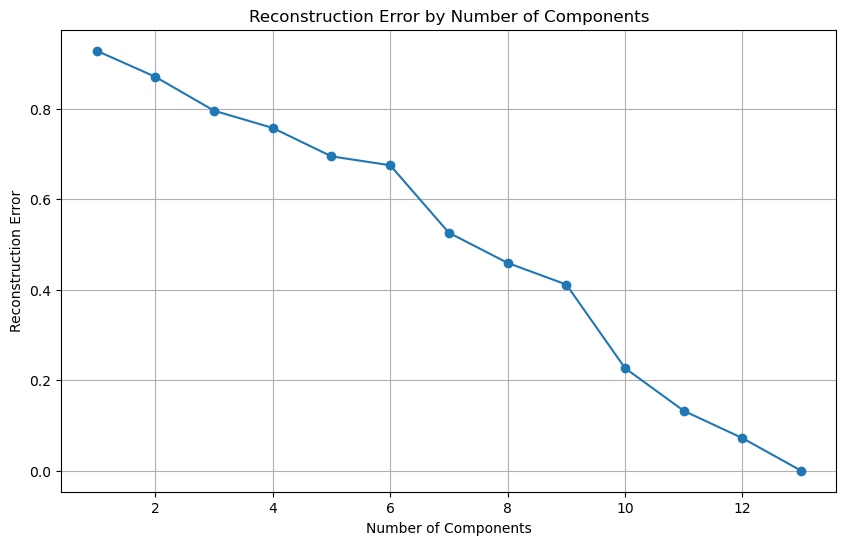

In [75]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.random_projection import GaussianRandomProjection

# Initialize the list to store reconstruction errors
reconstruction_errors = []

# Define the range of components to test
component_range = range(1, X_scaled.shape[1] + 1)  # From 1 to the original number of features

for n_components in component_range:
    # Apply Gaussian Random Projection
    rp = GaussianRandomProjection(n_components=n_components, random_state=42)
    X_projected = rp.fit_transform(X_scaled)
    
    # Calculate the reconstruction error
    reconstructed = rp.inverse_transform(X_projected)  # Project back to original space
    reconstruction_error = np.mean((X_scaled - reconstructed) ** 2)
    reconstruction_errors.append(reconstruction_error)

# Plotting the Reconstruction Error Plot
plt.figure(figsize=(10, 6))
plt.plot(component_range, reconstruction_errors, marker='o')
plt.title('Reconstruction Error by Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Reconstruction Error')
plt.grid(True)
plt.show()


In [76]:
from sklearn.random_projection import GaussianRandomProjection
import pandas as pd

# Assuming `X_scaled` is your standardized features matrix
grp = GaussianRandomProjection(n_components=10, random_state=42)
X_grp = grp.fit_transform(X_scaled)

# Create a DataFrame for the reduced data
reduced_data_df = pd.DataFrame(X_grp, columns=[f'Component_{i+1}' for i in range(X_grp.shape[1])])
print(reduced_data_df.head())


   Component_1  Component_2  Component_3  Component_4  Component_5  \
0    -0.421224     1.000029     0.763525     0.396383    -0.071412   
1    -0.036822     0.760502     0.367449    -0.470411     0.111204   
2    -0.481749     0.713217     1.336197    -0.752571    -0.228697   
3    -0.859429     1.184064     1.316925    -0.795420    -0.509331   
4    -0.703335     0.994589     1.282300    -1.000644    -0.423045   

   Component_6  Component_7  Component_8  Component_9  Component_10  
0    -0.809090    -0.330105     0.861650    -1.070634      0.162270  
1     0.326574    -0.501836     1.091469    -1.422038     -0.136938  
2     0.209602    -0.547622     1.327697    -1.059983      0.739135  
3    -0.019719    -0.492553     1.402673    -1.273383      0.883472  
4     0.120662    -0.589265     1.360826    -1.461150      0.791087  


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

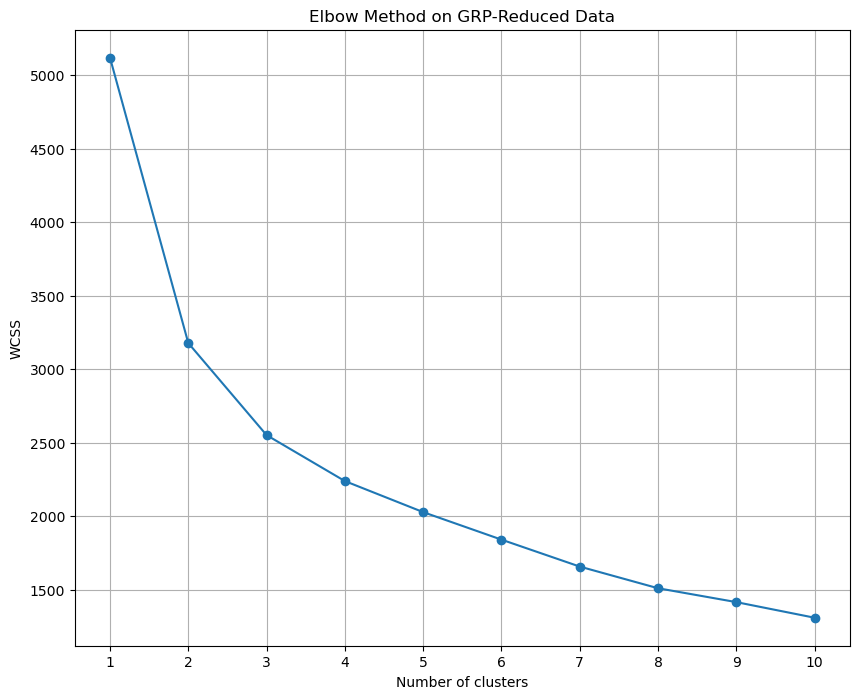

In [77]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X_grp_selected = reduced_data_df.values  # Convert the DataFrame to a NumPy array for fitting KMeans

# Use the Elbow Method on the GRP-reduced data
wcss = []  # List to hold the within-cluster sum of squares for each number of clusters
for i in range(1, 11):  # Testing for 1 to 10 clusters
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_grp_selected)  # Fit KMeans on the GRP-reduced data
    wcss.append(kmeans.inertia_)  # Append the inertia (WCSS) to the list

# Plotting the Elbow Method graph with a grid
plt.figure(figsize=(10, 8))  # Adjust the figure size if necessary
plt.plot(range(1, 11), wcss, marker='o')  # Add markers for each point
plt.title('Elbow Method on GRP-Reduced Data')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within Cluster Sum of Squares
plt.grid(True)  # Add a grid to the plot
plt.xticks(range(1, 11))  # Ensure x-axis ticks show every number of clusters tested
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


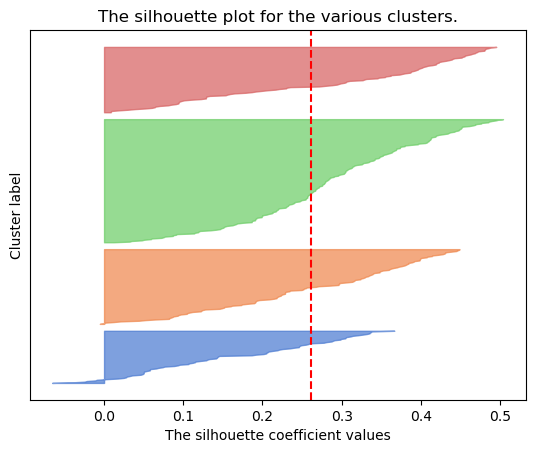

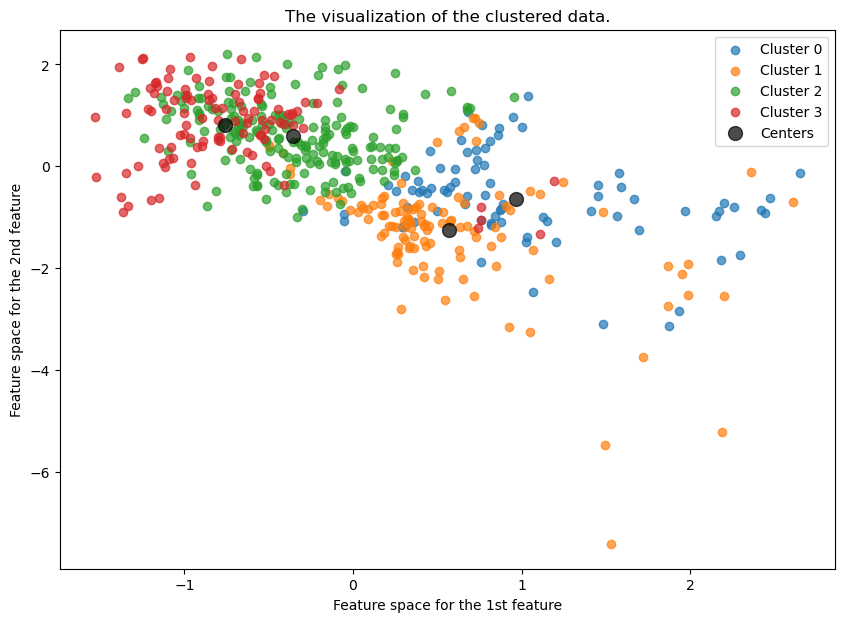

Homogeneity: 0.158
Completeness: 0.620
V-measure: 0.252
Adjusted Rand Index (ARI): 0.003


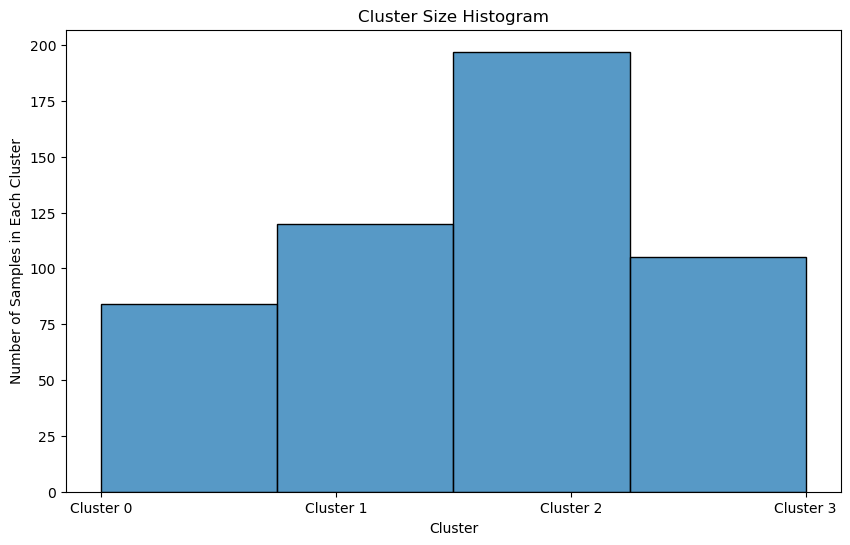

In [79]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'reduced_data_df' is your GRP-reduced dataset
X_grp_selected = reduced_data_df.values

# Optimal number of clusters found from previous analysis
optimal_k = 4

# Apply KMeans
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_grp_selected)  # Apply it on the GRP-reduced data

# Calculate silhouette scores
silhouette_avg = silhouette_score(X_grp_selected, clusters)
sample_silhouette_values = silhouette_samples(X_grp_selected, clusters)

# Silhouette Score Plot
fig, ax1 = plt.subplots(1, 1)
y_lower = 10
color_palette = sns.color_palette("muted", optimal_k)

for i in range(optimal_k):
    ith_cluster_silhouette_values = sample_silhouette_values[clusters == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = color_palette[i]
    ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)
    y_lower = y_upper + 10

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
ax1.set_yticks([])  # Clear the y-axis labels

plt.show()

# Scatter plot for each cluster
plt.figure(figsize=(10, 7))
palette = sns.color_palette("viridis", n_colors=optimal_k)

for i in range(optimal_k):
    cluster_mask = (clusters == i)
    plt.scatter(X_grp_selected[cluster_mask, 0], X_grp_selected[cluster_mask, 1], label=f'Cluster {i}', alpha=0.7)

# Add cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, label='Centers', alpha=0.7)

plt.title("The visualization of the clustered data.")
plt.xlabel("Feature space for the 1st feature")
plt.ylabel("Feature space for the 2nd feature")
plt.legend()
plt.show()

# Assuming 'y' is your target variable
if not np.issubdtype(y.dtype, np.integer):
    y_encoded = LabelEncoder().fit_transform(y)
else:
    y_encoded = y

# Calculate clustering metrics
homogeneity = homogeneity_score(y_encoded, clusters)
completeness = completeness_score(y_encoded, clusters)
v_measure = v_measure_score(y_encoded, clusters)
ARI = adjusted_rand_score(y_encoded, clusters)

print(f'Homogeneity: {homogeneity:.3f}')
print(f'Completeness: {completeness:.3f}')
print(f'V-measure: {v_measure:.3f}')
print(f'Adjusted Rand Index (ARI): {ARI:.3f}')

# Cluster Size Histogram
plt.figure(figsize=(10, 6))
sns.histplot(clusters, kde=False, bins=optimal_k)
plt.title('Cluster Size Histogram')
plt.xlabel('Cluster')
plt.ylabel('Number of Samples in Each Cluster')
plt.xticks(ticks=range(optimal_k), labels=[f'Cluster {i}' for i in range(optimal_k)])
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

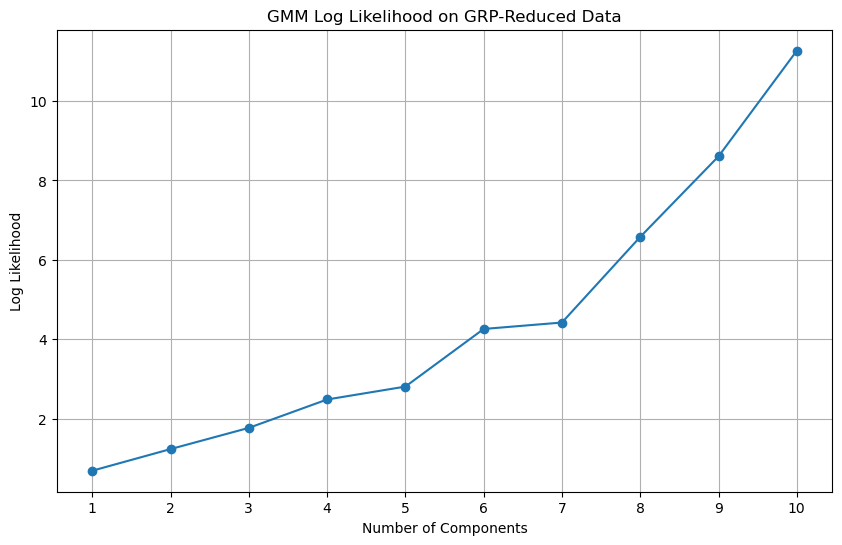

In [83]:
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.random_projection import GaussianRandomProjection


grp = GaussianRandomProjection(n_components=10, random_state=42)
X_grp = grp.fit_transform(X_scaled)

# Create a DataFrame for the reduced data
reduced_data_df = pd.DataFrame(X_grp, columns=[f'Component_{i+1}' for i in range(X_grp.shape[1])])

# We will check for the number of components from 1 to 10 (which is the number of components we have after GRP)
n_components_range = range(1, reduced_data_df.shape[1] + 1)
log_likelihoods = []

for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, random_state=42)
    gmm.fit(reduced_data_df)  # Fit GMM on the GRP-reduced data
    log_likelihoods.append(gmm.score(reduced_data_df))  # score() returns the log likelihood

# Plot the log likelihoods for each number of components
plt.figure(figsize=(10, 6))
plt.plot(n_components_range, log_likelihoods, marker='o')
plt.title('GMM Log Likelihood on GRP-Reduced Data')
plt.xlabel('Number of Components')
plt.ylabel('Log Likelihood')
plt.grid(True)
plt.xticks(n_components_range)
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Homogeneity (GMM): 0.174
Completeness (GMM): 0.618
V-measure (GMM): 0.271
Adjusted Rand Index (GMM): 0.002


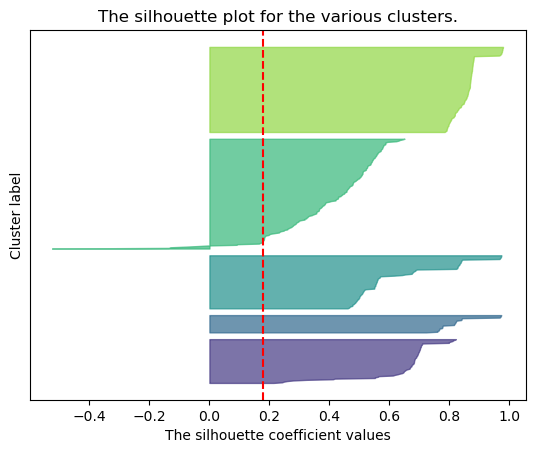

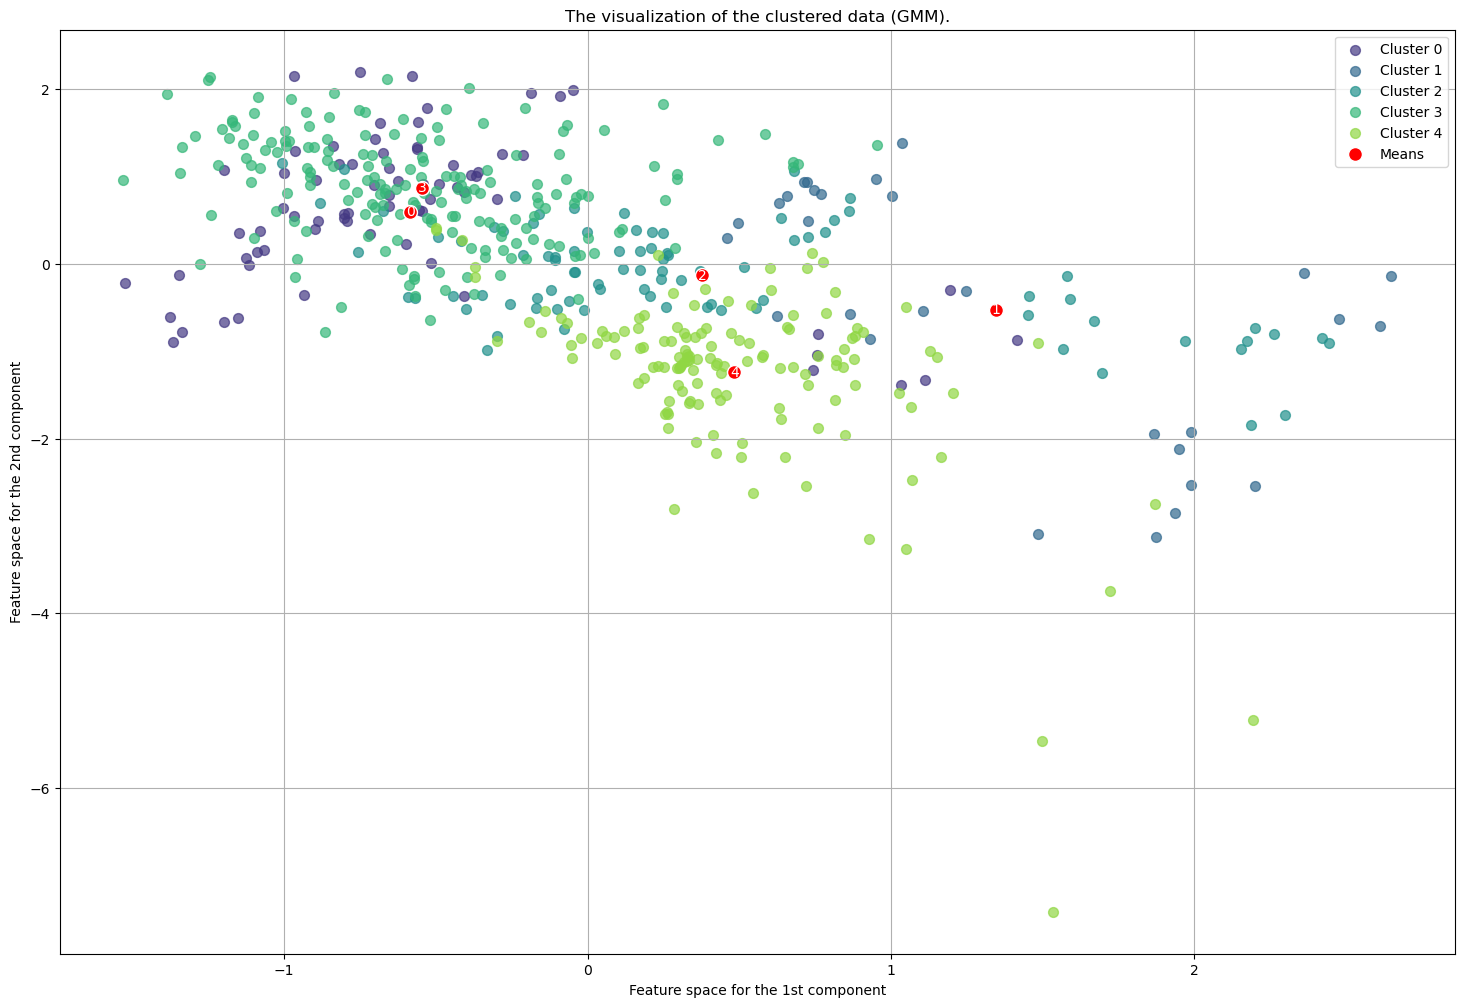

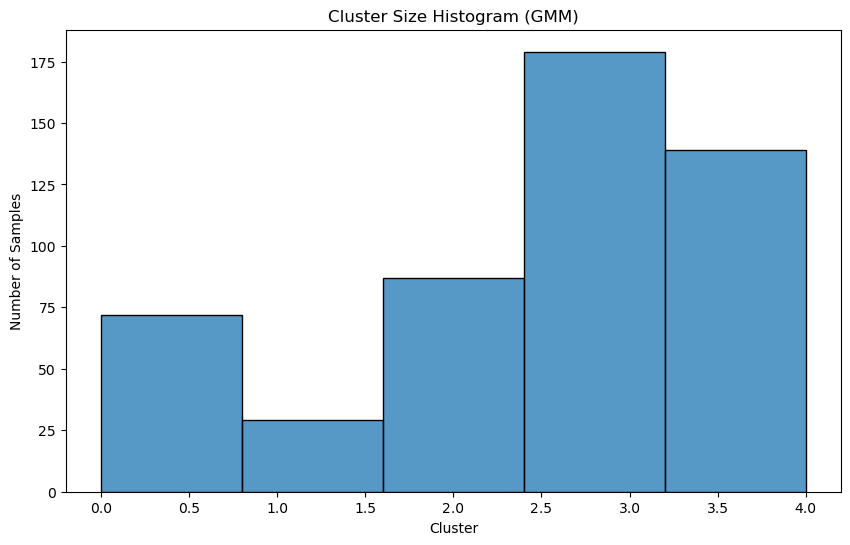

In [118]:
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import silhouette_score

grp = GaussianRandomProjection(n_components=10, random_state=42)
X_grp = grp.fit_transform(X_scaled)

reduced_data_df = pd.DataFrame(X_grp, columns=[f'Component_{i+1}' for i in range(X_grp.shape[1])])

optimal_k = 5

# Fit Gaussian Mixture Model
gmm = GaussianMixture(n_components=optimal_k, random_state=42)
gmm_clusters = gmm.fit_predict(reduced_data_df)

# Calculate silhouette scores for GMM
gmm_silhouette_avg = silhouette_score(reduced_data_df, gmm_clusters)

# Silhouette Score Plot for GMM
fig, ax1 = plt.subplots(1, 1)
y_lower = 10
color_palette = sns.color_palette("viridis", n_colors=optimal_k)

for i in range(optimal_k):
    # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
    ith_cluster_silhouette_values = gmm_sample_silhouette_values[gmm_clusters == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = color_palette[i]
    ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")
ax1.axvline(x=gmm_silhouette_avg, color="red", linestyle="--")
ax1.set_yticks([])

# Scatter Plot for GMM
plt.figure(figsize=(18, 12))

# Scatter plot for each cluster
for i in range(optimal_k):
    cluster_mask = (gmm_clusters == i)
    plt.scatter(reduced_data_df.loc[cluster_mask, 'Component_1'], reduced_data_df.loc[cluster_mask, 'Component_2'], s=50, c=[color_palette[i]], label=f'Cluster {i}', alpha=0.7)

# Add scatter plot for cluster means
centers = gmm.means_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100, edgecolors='white', zorder=10, label='Means')

# Annotate the cluster means
for i, c in enumerate(centers):
    plt.text(c[0], c[1], str(i), color='white', ha='center', va='center', zorder=11)

plt.title("The visualization of the clustered data (GMM).")
plt.xlabel("Feature space for the 1st component")
plt.ylabel("Feature space for the 2nd component")
plt.grid(True)
plt.legend()

# Cluster Size Histogram for GMM
plt.figure(figsize=(10, 6))
sns.histplot(gmm_clusters, kde=False, bins=optimal_k)
plt.title('Cluster Size Histogram (GMM)')
plt.xlabel('Cluster')
plt.ylabel('Number of Samples')

# Calculate Metrics for GMM
gmm_homogeneity = homogeneity_score(y_encoded, gmm_clusters)
gmm_completeness = completeness_score(y_encoded, gmm_clusters)
gmm_v_measure = v_measure_score(y_encoded, gmm_clusters)
gmm_ARI = adjusted_rand_score(y_encoded, gmm_clusters)

print(f'Homogeneity (GMM): {gmm_homogeneity:.3f}')
print(f'Completeness (GMM): {gmm_completeness:.3f}')
print(f'V-measure (GMM): {gmm_v_measure:.3f}')
print(f'Adjusted Rand Index (GMM): {gmm_ARI:.3f}')

plt.show()


In [99]:
!pip install umap-learn


Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/90.9 kB ? eta -:--:--
     ---- ----------------------------------- 10.2/90.9 kB ? eta -:--:--
     ------------ ------------------------- 30.7/90.9 kB 325.1 kB/s eta 0:00:01
     ------------------------- ------------ 61.4/90.9 kB 465.5 kB/s eta 0:00:01
     -------------------------------------- 90.9/90.9 kB 571.9 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Obtaining dependency information for pynndescent>=0.5 from https://files.pythonhosted.org/packages/4e/82/0b9851a2fd4da9b57d7931446f5ebab92a98f1f35d3dc0dae5f9ed50a462/pynndescent-0.5.11-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/55.8 kB ? eta -:--:--
   ---------------------------------------- 55.8/55.8 kB 2.8 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.random_projection import GaussianRandomProjection
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score
from sklearn.preprocessing import LabelEncoder

# Load your dataset
bh_data = pd.read_csv('D:\\CS Classes at GT\\CS 7641 - ML\\ASSIGNMENT - 3/boston.csv')
X = bh_data.drop('MEDV', axis=1)
y = bh_data['MEDV']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply Gaussian Random Projection
grp = GaussianRandomProjection(n_components=10, random_state=42)
X_grp = grp.fit_transform(X_scaled)

# Ensure the shapes are consistent
print(f"Shape of X_scaled: {X_scaled.shape}")
print(f"Shape of X_grp: {X_grp.shape}")
print(f"Length of y: {len(y)}")

# If the assertion passes, it means the lengths are consistent
assert len(y) == X_grp.shape[0], "The length of the target variable and clustered data must be the same."

# Encode the target variable if necessary
y_encoded = LabelEncoder().fit_transform(y) if not np.issubdtype(y.dtype, np.integer) else y

# Clustering with Gaussian Mixture Model
gmm = GaussianMixture(n_components=3, random_state=42)
gmm_clusters = gmm.fit_predict(X_grp)

# Calculate metrics
silhouette_avg = silhouette_score(X_grp, gmm_clusters)
homogeneity = homogeneity_score(y_encoded, gmm_clusters)
completeness = completeness_score(y_encoded, gmm_clusters)
v_measure = v_measure_score(y_encoded, gmm_clusters)

# Output the results
print(f"Silhouette: {silhouette_avg:.2f}, Homogeneity: {homogeneity:.2f}, Completeness: {completeness:.2f}, V-measure: {v_measure:.2f}")


Shape of X_scaled: (506, 13)
Shape of X_grp: (506, 10)
Length of y: 506
Silhouette: 0.21, Homogeneity: 0.12, Completeness: 0.58, V-measure: 0.20


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


C:\Users\hoode\AppData\Roaming\Python\Python311\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


      UMAP1     UMAP2
0 -0.903826  7.732717
1 -1.260122  7.538668
2 -1.157370  8.384724
3 -1.660224  7.993181
4 -1.604439  8.038148


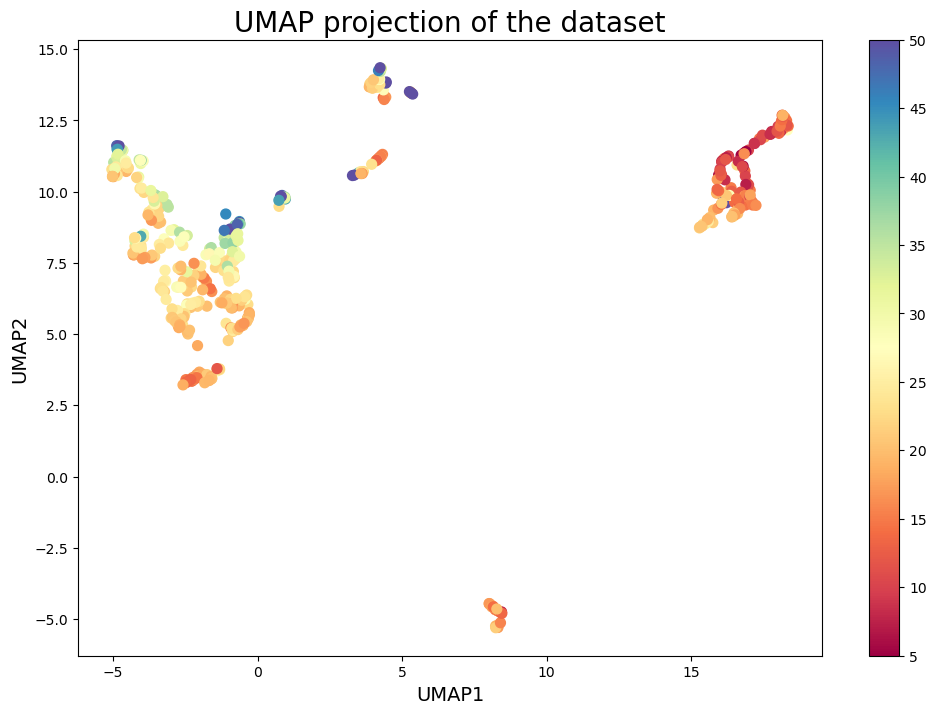

In [103]:
import umap
from sklearn.preprocessing import StandardScaler



# Initialize and fit UMAP
umap_reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
X_umap = umap_reducer.fit_transform(X_scaled)

# Convert the transformed data into a DataFrame for easier manipulation and visualization
X_umap_df = pd.DataFrame(X_umap, columns=['UMAP1', 'UMAP2'])

# Display the first few rows of the transformed data
print(X_umap_df.head())

# You can now visualize the UMAP-reduced data
plt.figure(figsize=(12, 8))
plt.scatter(X_umap_df['UMAP1'], X_umap_df['UMAP2'], c=y, cmap='Spectral', s=50)
plt.colorbar()
plt.title('UMAP projection of the dataset', fontsize=20)
plt.xlabel('UMAP1', fontsize=14)
plt.ylabel('UMAP2', fontsize=14)
plt.show()


C:\Users\hoode\AppData\Roaming\Python\Python311\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\hoode\AppData\Roaming\Python\Python311\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_sta

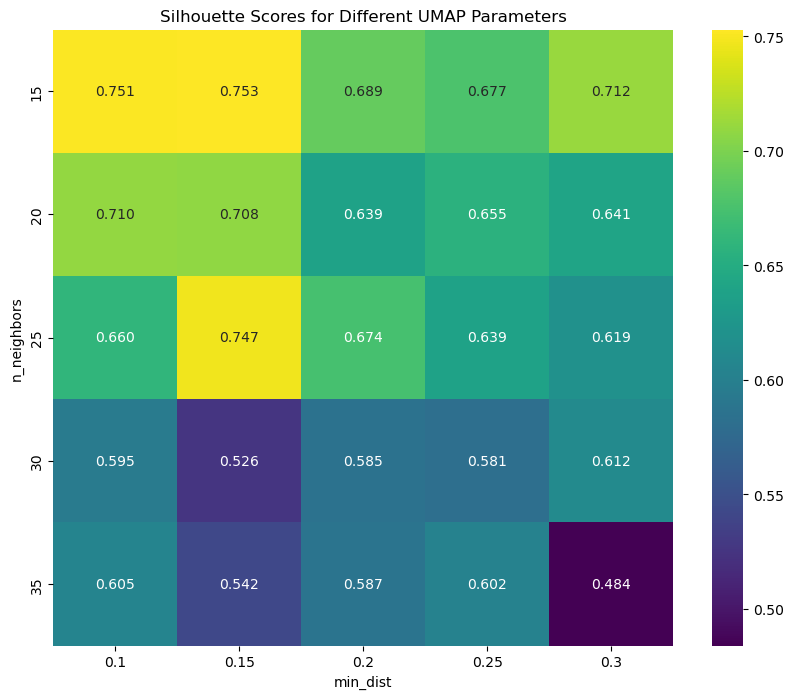

In [107]:
from sklearn.metrics import silhouette_score
import numpy as np
import seaborn as sns
import umap
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Define the number of clusters
k = 3  # or any other number based on your dataset or prior knowledge

# Define ranges for n_neighbors and min_dist
n_neighbors_range = range(15, 36, 5)
min_dist_range = np.linspace(0.1, 0.3, num=5)

# Initialize a list to store the silhouette scores
silhouette_scores = []

for n_neighbors in n_neighbors_range:
    for min_dist in min_dist_range:
        # Apply UMAP with the current parameters
        umap_reducer = umap.UMAP(n_neighbors=n_neighbors, min_dist=min_dist, n_components=2, random_state=42)
        X_umap = umap_reducer.fit_transform(X_scaled)
        
        # Perform clustering (e.g., KMeans) on the reduced data and calculate the silhouette score
        kmeans = KMeans(n_clusters=k, random_state=42).fit(X_umap)
        score = silhouette_score(X_umap, kmeans.labels_)
        
        # Store the parameters and the score
        silhouette_scores.append((n_neighbors, min_dist, score))

# Convert the results to a DataFrame for easier analysis
results_df = pd.DataFrame(silhouette_scores, columns=['n_neighbors', 'min_dist', 'silhouette_score'])

# Use Seaborn to create a heatmap or a scatter plot to visualize the scores
plt.figure(figsize=(10, 8))
sns.heatmap(results_df.pivot(index='n_neighbors', columns='min_dist', values='silhouette_score'), annot=True, fmt=".3f", cmap='viridis')
plt.title('Silhouette Scores for Different UMAP Parameters')
plt.show()



In [109]:
from umap import UMAP
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd
import numpy as np

# Set your UMAP parameters
n_neighbors = 15
min_dist = 0.15

# Range of n_components to try
n_components_range = range(1, 13)  
# Initialize lists to store the results
silhouette_scores = []
kmeans_scores = []

# Loop over the range of n_components
for n_components in n_components_range:
    # Apply UMAP reduction
    umap_reducer = UMAP(n_neighbors=n_neighbors, min_dist=min_dist, n_components=n_components, random_state=42)
    X_umap = umap_reducer.fit_transform(X_scaled)

    # Apply KMeans clustering
    kmeans = KMeans(n_clusters=optimal_k, random_state=42)
    clusters = kmeans.fit_predict(X_umap)

    # Compute silhouette score
    silhouette_avg = silhouette_score(X_umap, clusters)
    silhouette_scores.append((n_components, silhouette_avg))

    # Compute clustering performance, for instance, the inertia (sum of squared distances to closest cluster center)
    kmeans_score = kmeans.inertia_
    kmeans_scores.append((n_components, kmeans_score))

# Convert the results to a DataFrame for easier analysis
silhouette_results_df = pd.DataFrame(silhouette_scores, columns=['n_components', 'silhouette_score'])
kmeans_results_df = pd.DataFrame(kmeans_scores, columns=['n_components', 'kmeans_score'])

# Now you can plot the results or directly inspect the dataframes
print(silhouette_results_df)
print(kmeans_results_df)


C:\Users\hoode\AppData\Roaming\Python\Python311\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\hoode\AppData\Roaming\Python\Python311\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_sta

    n_components  silhouette_score
0              1          0.655453
1              2          0.631401
2              3          0.643237
3              4          0.617354
4              5          0.621684
5              6          0.614915
6              7          0.637924
7              8          0.616956
8              9          0.648955
9             10          0.627964
10            11          0.629571
11            12          0.652418
    n_components  kmeans_score
0              1   2361.231201
1              2   1524.260742
2              3   1403.624268
3              4   1486.756226
4              5   1445.445679
5              6   1543.270508
6              7   1437.288574
7              8   1581.429932
8              9   1365.659546
9             10   1450.840942
10            11   1406.665771
11            12   1328.269653


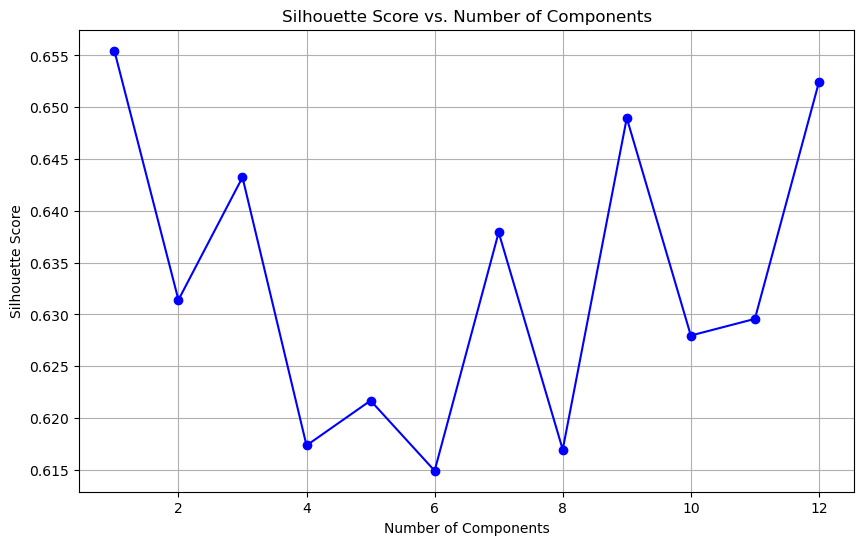

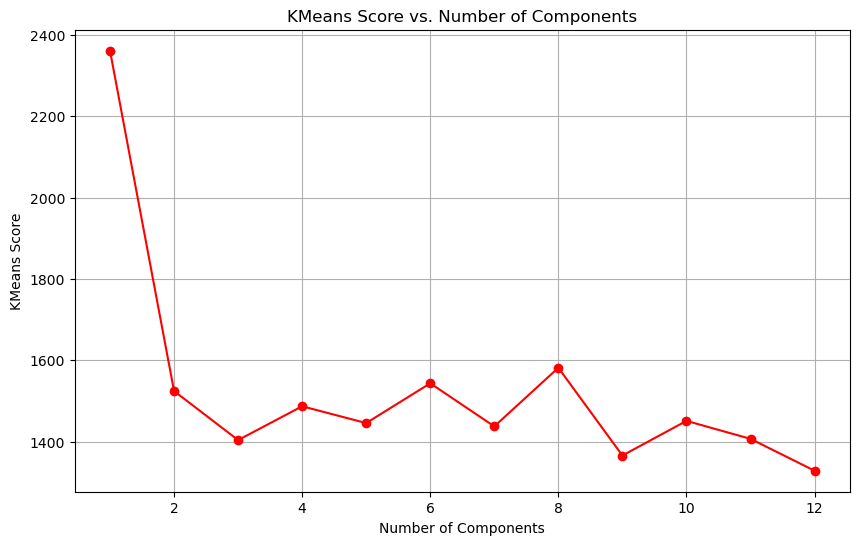

In [110]:
import matplotlib.pyplot as plt

# Plot silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(silhouette_results_df['n_components'], silhouette_results_df['silhouette_score'], marker='o', color='b')
plt.title('Silhouette Score vs. Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

# Plot KMeans scores
plt.figure(figsize=(10, 6))
plt.plot(kmeans_results_df['n_components'], kmeans_results_df['kmeans_score'], marker='o', color='r')
plt.title('KMeans Score vs. Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('KMeans Score')
plt.grid(True)
plt.show()


In [119]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from umap import UMAP
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture  # Corrected import
from sklearn.metrics import silhouette_score, homogeneity_score, completeness_score, v_measure_score
from sklearn.preprocessing import LabelEncoder

# Load your dataset
# Make sure to adjust the path to where your dataset is located
bh_data = pd.read_csv('D:\\CS Classes at GT\\CS 7641 - ML\\ASSIGNMENT - 3/boston.csv')
X = bh_data.drop('MEDV', axis=1)
y = bh_data['MEDV']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply UMAP
umap_reducer = UMAP(n_neighbors=15, min_dist=0.15, n_components=9, random_state=42)
X_umap = umap_reducer.fit_transform(X_scaled)



C:\Users\hoode\AppData\Roaming\Python\Python311\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

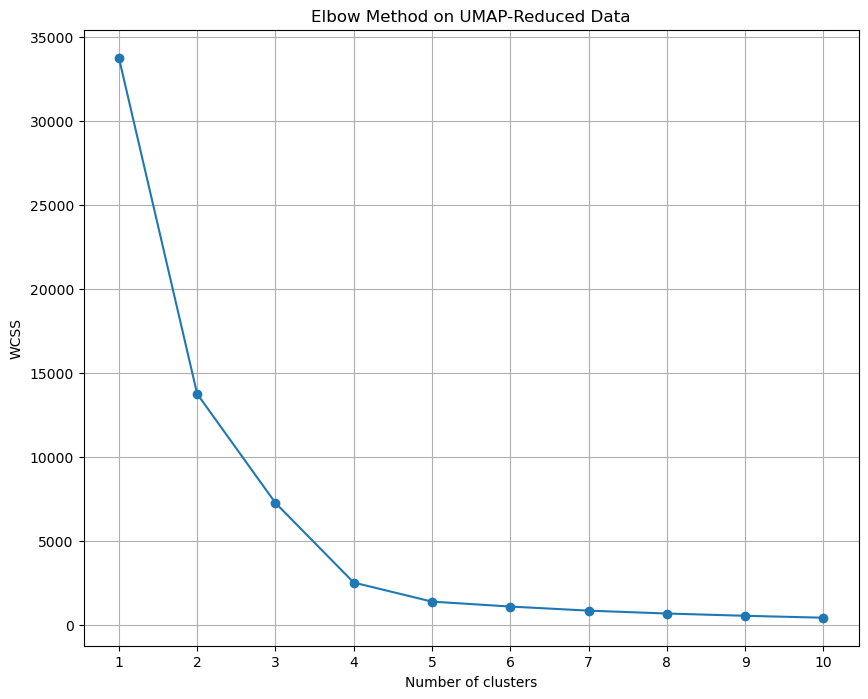

In [120]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# We assume 'X_umap' is your UMAP-reduced dataset
X_umap_selected = X_umap  # This is already a NumPy array from the UMAP reduction

# Use the Elbow Method on the UMAP-reduced data
wcss = []  # List to hold the within-cluster sum of squares for each number of clusters
for i in range(1, 11):  # Testing for 1 to 10 clusters
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_umap_selected)  # Fit KMeans on the UMAP-reduced data
    wcss.append(kmeans.inertia_)  # Append the inertia (WCSS) to the list

# Plotting the Elbow Method graph with a grid
plt.figure(figsize=(10, 8))  # Adjust the figure size if necessary
plt.plot(range(1, 11), wcss, marker='o')  # Add markers for each point
plt.title('Elbow Method on UMAP-Reduced Data')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within Cluster Sum of Squares
plt.grid(True)  # Add a grid to the plot
plt.xticks(range(1, 11))  # Ensure x-axis ticks show every number of clusters tested
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


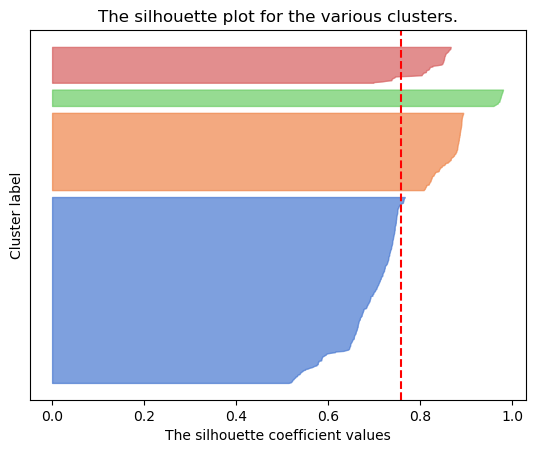

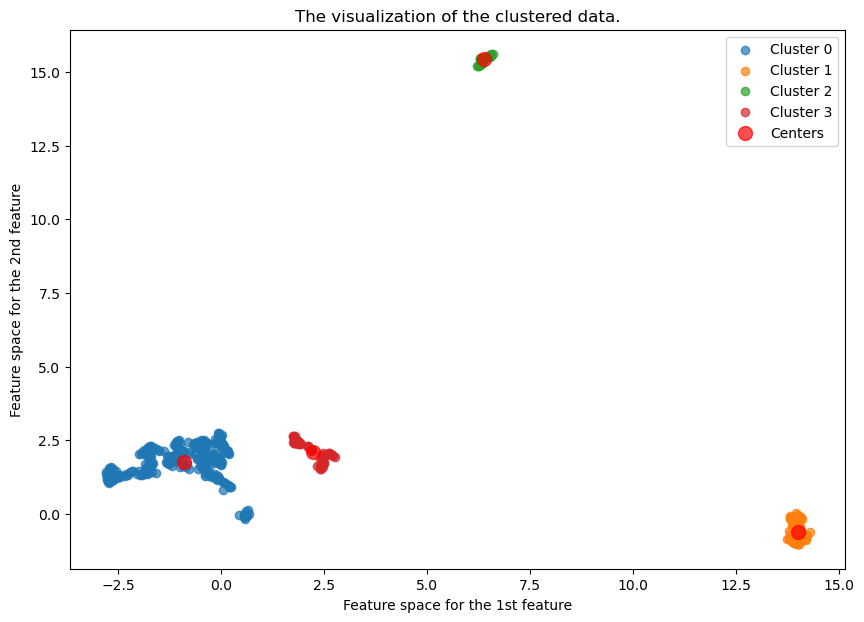

Homogeneity: 0.132
Completeness: 0.648
V-measure: 0.219
Adjusted Rand Index (ARI): 0.002


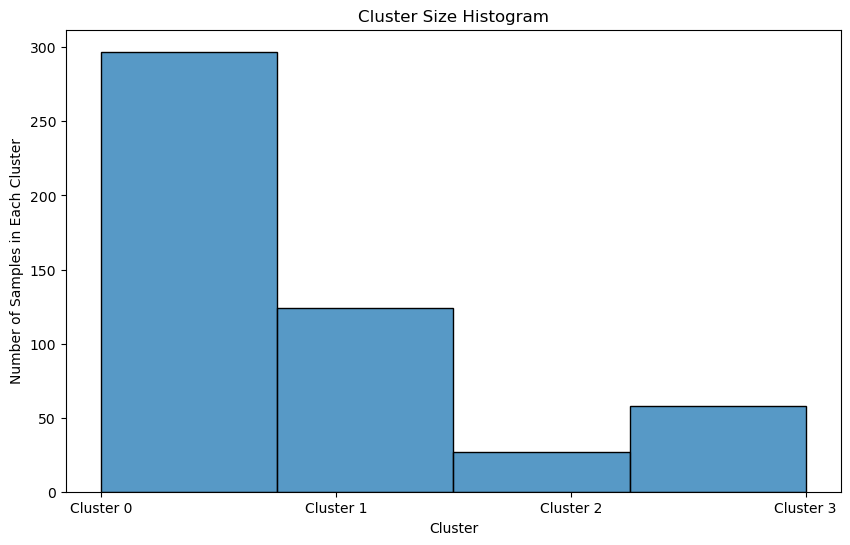

In [121]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# UMAP reduced data
X_umap_selected = X_umap

# Optimal number of clusters found from previous analysis
optimal_k = 4

# Apply KMeans
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_umap_selected)

# Calculate silhouette scores
silhouette_avg = silhouette_score(X_umap_selected, clusters)
sample_silhouette_values = silhouette_samples(X_umap_selected, clusters)

# Silhouette Score Plot
fig, ax1 = plt.subplots(1, 1)
y_lower = 10
color_palette = sns.color_palette("muted", optimal_k)

for i in range(optimal_k):
    ith_cluster_silhouette_values = sample_silhouette_values[clusters == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = color_palette[i]
    ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)
    y_lower = y_upper + 10

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
ax1.set_yticks([])

plt.show()

# Scatter plot for each cluster
plt.figure(figsize=(10, 7))
palette = sns.color_palette("viridis", n_colors=optimal_k)

for i in range(optimal_k):
    cluster_mask = (clusters == i)
    plt.scatter(X_umap_selected[cluster_mask, 0], X_umap_selected[cluster_mask, 1], label=f'Cluster {i}', alpha=0.7)

# Add cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100, label='Centers', alpha=0.7)

plt.title("The visualization of the clustered data.")
plt.xlabel("Feature space for the 1st feature")
plt.ylabel("Feature space for the 2nd feature")
plt.legend()
plt.show()

# Calculate Metrics
y_integer_encoded = LabelEncoder().fit_transform(y) if not np.issubdtype(y.dtype, np.integer) else y

homogeneity = homogeneity_score(y_integer_encoded, clusters)
completeness = completeness_score(y_integer_encoded, clusters)
v_measure = v_measure_score(y_integer_encoded, clusters)
ARI = adjusted_rand_score(y_integer_encoded, clusters)

print(f'Homogeneity: {homogeneity:.3f}')
print(f'Completeness: {completeness:.3f}')
print(f'V-measure: {v_measure:.3f}')
print(f'Adjusted Rand Index (ARI): {ARI:.3f}')

# Cluster Size Histogram
plt.figure(figsize=(10, 6))
sns.histplot(clusters, kde=False, bins=optimal_k)
plt.title('Cluster Size Histogram')
plt.xlabel('Cluster')
plt.ylabel('Number of Samples in Each Cluster')
plt.xticks(ticks=range(optimal_k), labels=[f'Cluster {i}' for i in range(optimal_k)])
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

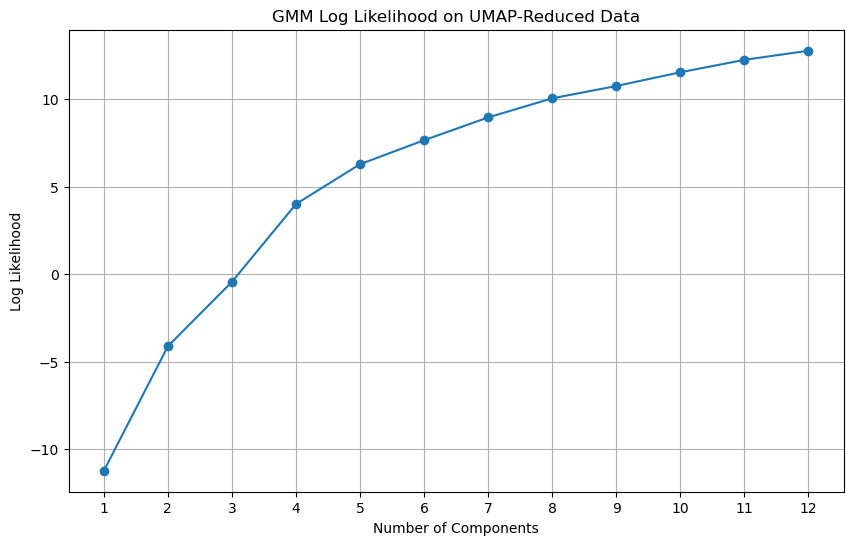

In [122]:
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

# Assuming X_umap is your UMAP-reduced dataset from the previous step
# We will check for the number of components from 1 to a maximum number (you could use the number of UMAP components)
n_components_range = range(1, 13)
log_likelihoods = []

for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, random_state=42)
    gmm.fit(X_umap)  # Fit GMM on the UMAP-reduced data
    log_likelihoods.append(gmm.score(X_umap))  # score() returns the log likelihood

# Plot the log likelihoods for each number of components
plt.figure(figsize=(10, 6))
plt.plot(n_components_range, log_likelihoods, marker='o')
plt.title('GMM Log Likelihood on UMAP-Reduced Data')
plt.xlabel('Number of Components')
plt.ylabel('Log Likelihood')
plt.grid(True)
plt.xticks(n_components_range)
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


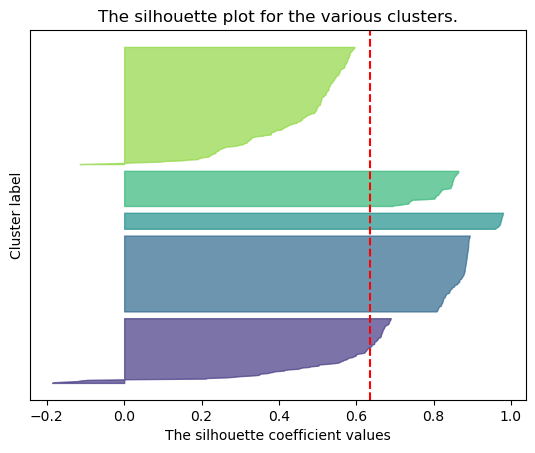

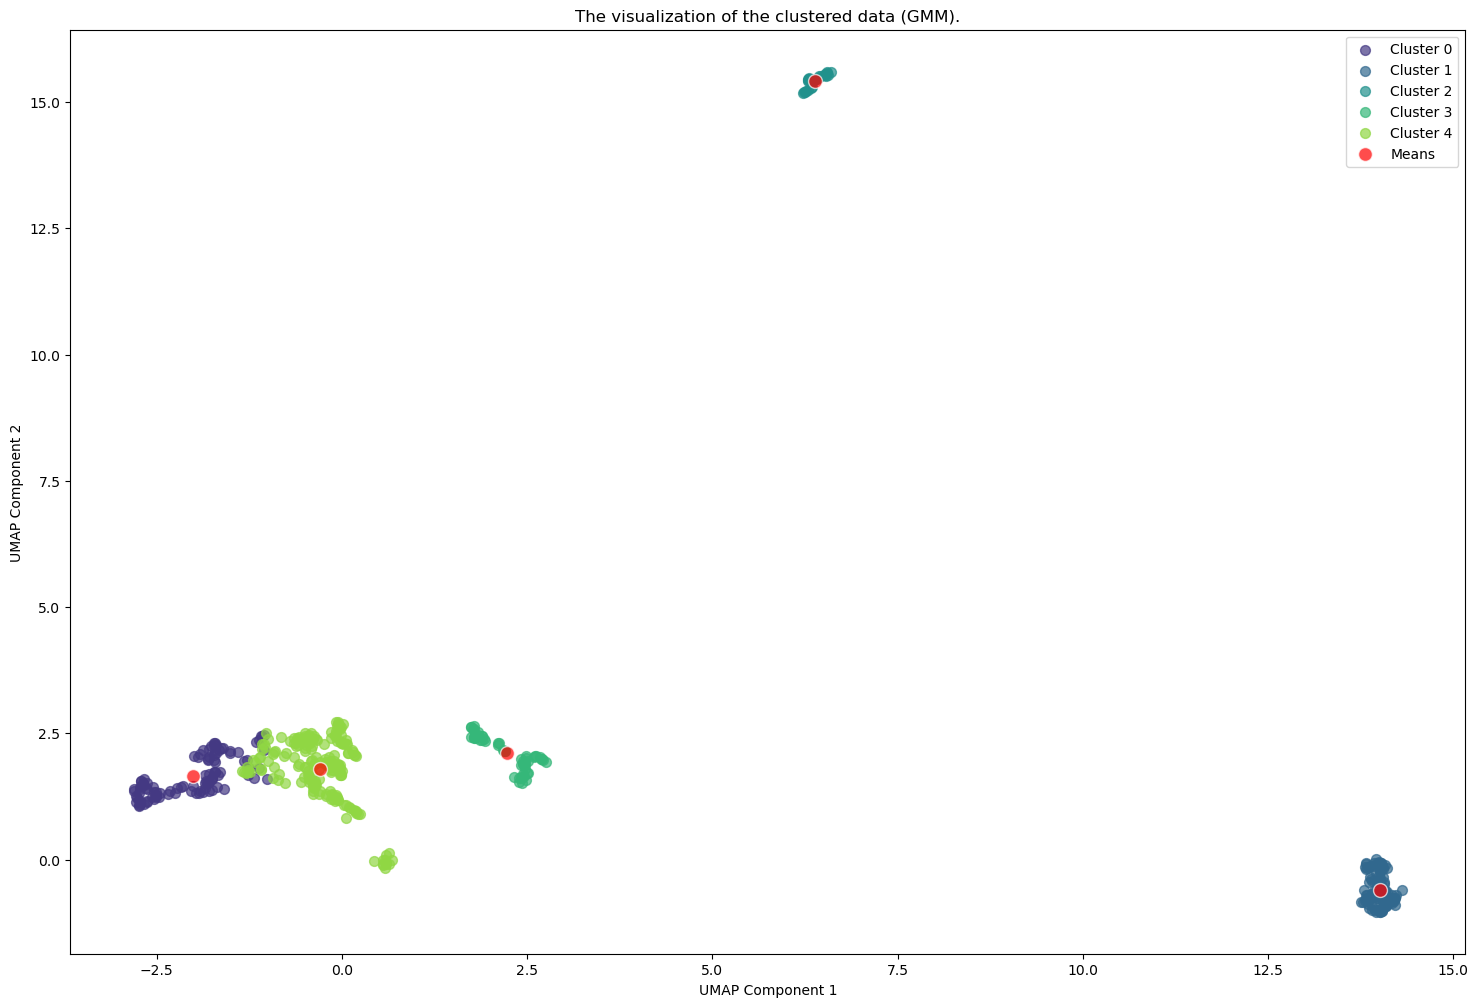

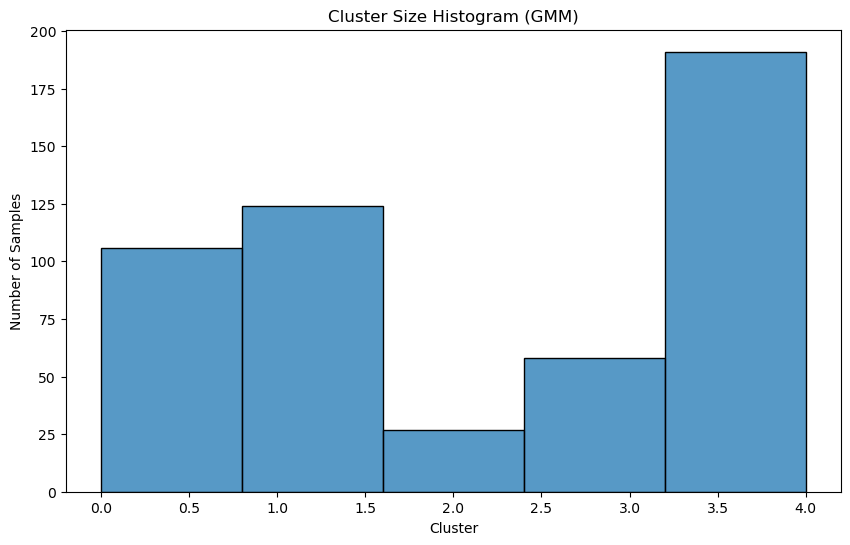

Homogeneity (GMM): 0.179
Completeness (GMM): 0.646
V-measure (GMM): 0.280
Adjusted Rand Index (GMM): 0.004


In [123]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score

# Assuming X_umap is your UMAP-reduced dataset from the previous step
# Assuming y is your target variable

# Set the number of components for GMM based on your previous analysis
optimal_k = 5

# Fit Gaussian Mixture Model on UMAP-reduced data
gmm = GaussianMixture(n_components=optimal_k, random_state=42)
gmm_clusters = gmm.fit_predict(X_umap)

# Calculate silhouette scores for GMM
gmm_silhouette_avg = silhouette_score(X_umap, gmm_clusters)
gmm_sample_silhouette_values = silhouette_samples(X_umap, gmm_clusters)

# Silhouette Score Plot for GMM
fig, ax1 = plt.subplots(1, 1)
y_lower = 10
color_palette = sns.color_palette("viridis", n_colors=optimal_k)

for i in range(optimal_k):
    ith_cluster_silhouette_values = gmm_sample_silhouette_values[gmm_clusters == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = color_palette[i]
    ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")
ax1.axvline(x=gmm_silhouette_avg, color="red", linestyle="--")
ax1.set_yticks([])

plt.show()

# Scatter Plot for GMM clusters
plt.figure(figsize=(18, 12))

for i in range(optimal_k):
    cluster_mask = gmm_clusters == i
    plt.scatter(X_umap[cluster_mask, 0], X_umap[cluster_mask, 1], s=50, c=[color_palette[i]], label=f'Cluster {i}', alpha=0.7)

# Add scatter plot for cluster means
centers = gmm.means_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100, edgecolors='white', label='Means', alpha=0.7)

plt.title("The visualization of the clustered data (GMM).")
plt.xlabel("UMAP Component 1")
plt.ylabel("UMAP Component 2")
plt.legend()

plt.show()

# Cluster Size Histogram for GMM
plt.figure(figsize=(10, 6))
sns.histplot(gmm_clusters, kde=False, bins=optimal_k)
plt.title('Cluster Size Histogram (GMM)')
plt.xlabel('Cluster')
plt.ylabel('Number of Samples')

plt.show()

# Calculate Metrics for GMM - make sure y is encoded if it's not numeric
y_encoded = LabelEncoder().fit_transform(y) if not np.issubdtype(y.dtype, np.integer) else y

gmm_homogeneity = homogeneity_score(y_encoded, gmm_clusters)
gmm_completeness = completeness_score(y_encoded, gmm_clusters)
gmm_v_measure = v_measure_score(y_encoded, gmm_clusters)
gmm_ARI = adjusted_rand_score(y_encoded, gmm_clusters)

print(f'Homogeneity (GMM): {gmm_homogeneity:.3f}')
print(f'Completeness (GMM): {gmm_completeness:.3f}')
print(f'V-measure (GMM): {gmm_v_measure:.3f}')
print(f'Adjusted Rand Index (GMM): {gmm_ARI:.3f}')
